In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [2]:
df = pd.read_csv("/kaggle/input/loan-default-dataset/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [6]:
# fixing the null values in categorical columns
# Lets first check the unique values in each Categorical columns

In [7]:
print('year                       : ',df['year'].unique())
print('Loan Limit                 : ',df['loan_limit'].unique())
print('Gender                     : ',df['Gender'].unique())
print('approv_in_adv              : ',df['approv_in_adv'].unique())
print('loan_type                  : ',df['loan_type'].unique())
print('loan_purpose               : ',df['loan_purpose'].unique())
print('Credit_Worthiness          : ',df['Credit_Worthiness'].unique())
print('open_credit                : ',df['open_credit'].unique())
print('business_or_commercial     : ',df['business_or_commercial'].unique())
print('Neg_ammortization          : ',df['Neg_ammortization'].unique())
print('interest_only              : ',df['interest_only'].unique())
print('lump_sum_payment           : ',df['lump_sum_payment'].unique())
print('construction_type          : ',df['construction_type'].unique())
print('occupancy_type             : ',df['occupancy_type'].unique())
print('Secured_by                 : ',df['Secured_by'].unique())
print('total_units                : ',df['total_units'].unique())
print('credit_type                : ',df['credit_type'].unique())
print('co-applicant_credit_type   : ',df['co-applicant_credit_type'].unique())
print('age                        : ',df['age'].unique())
print('submission_of_application  : ',df['submission_of_application'].unique())
print('Region                     : ',df['Region'].unique())
print('Security_Type              : ',df['Security_Type'].unique())
print('Status                     : ',df['Status'].unique())

year                       :  [2019]
Loan Limit                 :  ['cf' nan 'ncf']
Gender                     :  ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv              :  ['nopre' 'pre' nan]
loan_type                  :  ['type1' 'type2' 'type3']
loan_purpose               :  ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness          :  ['l1' 'l2']
open_credit                :  ['nopc' 'opc']
business_or_commercial     :  ['nob/c' 'b/c']
Neg_ammortization          :  ['not_neg' 'neg_amm' nan]
interest_only              :  ['not_int' 'int_only']
lump_sum_payment           :  ['not_lpsm' 'lpsm']
construction_type          :  ['sb' 'mh']
occupancy_type             :  ['pr' 'sr' 'ir']
Secured_by                 :  ['home' 'land']
total_units                :  ['1U' '2U' '3U' '4U']
credit_type                :  ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type   :  ['CIB' 'EXP']
age                        :  ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submissio

In [8]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
df[['loan_limit','approv_in_adv','loan_purpose','Neg_ammortization','age','submission_of_application']] = imputer_mode.fit_transform(df[['loan_limit','approv_in_adv','loan_purpose','Neg_ammortization','age','submission_of_application']])

In [9]:
print('Loan Limit                 : ',df['loan_limit'].unique())
print('Gender                     : ',df['Gender'].unique())
print('approv_in_adv              : ',df['approv_in_adv'].unique())
print('loan_type                  : ',df['loan_type'].unique())
print('loan_purpose               : ',df['loan_purpose'].unique())
print('Credit_Worthiness          : ',df['Credit_Worthiness'].unique())
print('open_credit                : ',df['open_credit'].unique())
print('business_or_commercial     : ',df['business_or_commercial'].unique())
print('Neg_ammortization          : ',df['Neg_ammortization'].unique())
print('interest_only              : ',df['interest_only'].unique())
print('lump_sum_payment           : ',df['lump_sum_payment'].unique())
print('construction_type          : ',df['construction_type'].unique())
print('occupancy_type             : ',df['occupancy_type'].unique())
print('Secured_by                 : ',df['Secured_by'].unique())
print('total_units                : ',df['total_units'].unique())
print('credit_type                : ',df['credit_type'].unique())
print('co-applicant_credit_type   : ',df['co-applicant_credit_type'].unique())
print('age                        : ',df['age'].unique())
print('submission_of_application  : ',df['submission_of_application'].unique())
print('Region                     : ',df['Region'].unique())
print('Security_Type              : ',df['Security_Type'].unique())
print('Status                     : ',df['Status'].unique())

Loan Limit                 :  ['cf' 'ncf']
Gender                     :  ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv              :  ['nopre' 'pre']
loan_type                  :  ['type1' 'type2' 'type3']
loan_purpose               :  ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness          :  ['l1' 'l2']
open_credit                :  ['nopc' 'opc']
business_or_commercial     :  ['nob/c' 'b/c']
Neg_ammortization          :  ['not_neg' 'neg_amm']
interest_only              :  ['not_int' 'int_only']
lump_sum_payment           :  ['not_lpsm' 'lpsm']
construction_type          :  ['sb' 'mh']
occupancy_type             :  ['pr' 'sr' 'ir']
Secured_by                 :  ['home' 'land']
total_units                :  ['1U' '2U' '3U' '4U']
credit_type                :  ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type   :  ['CIB' 'EXP']
age                        :  ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
submission_of_application  :  ['to_inst' 'not_inst']
Region       

In [10]:
# Lets fix the null values in Numerical columns
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df[['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1']] = imputer_mean.fit_transform(df[['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1']])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [12]:
df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [13]:
# No more null vaues present


### Data Analysis and Visualization

<Axes: xlabel='Status', ylabel='count'>

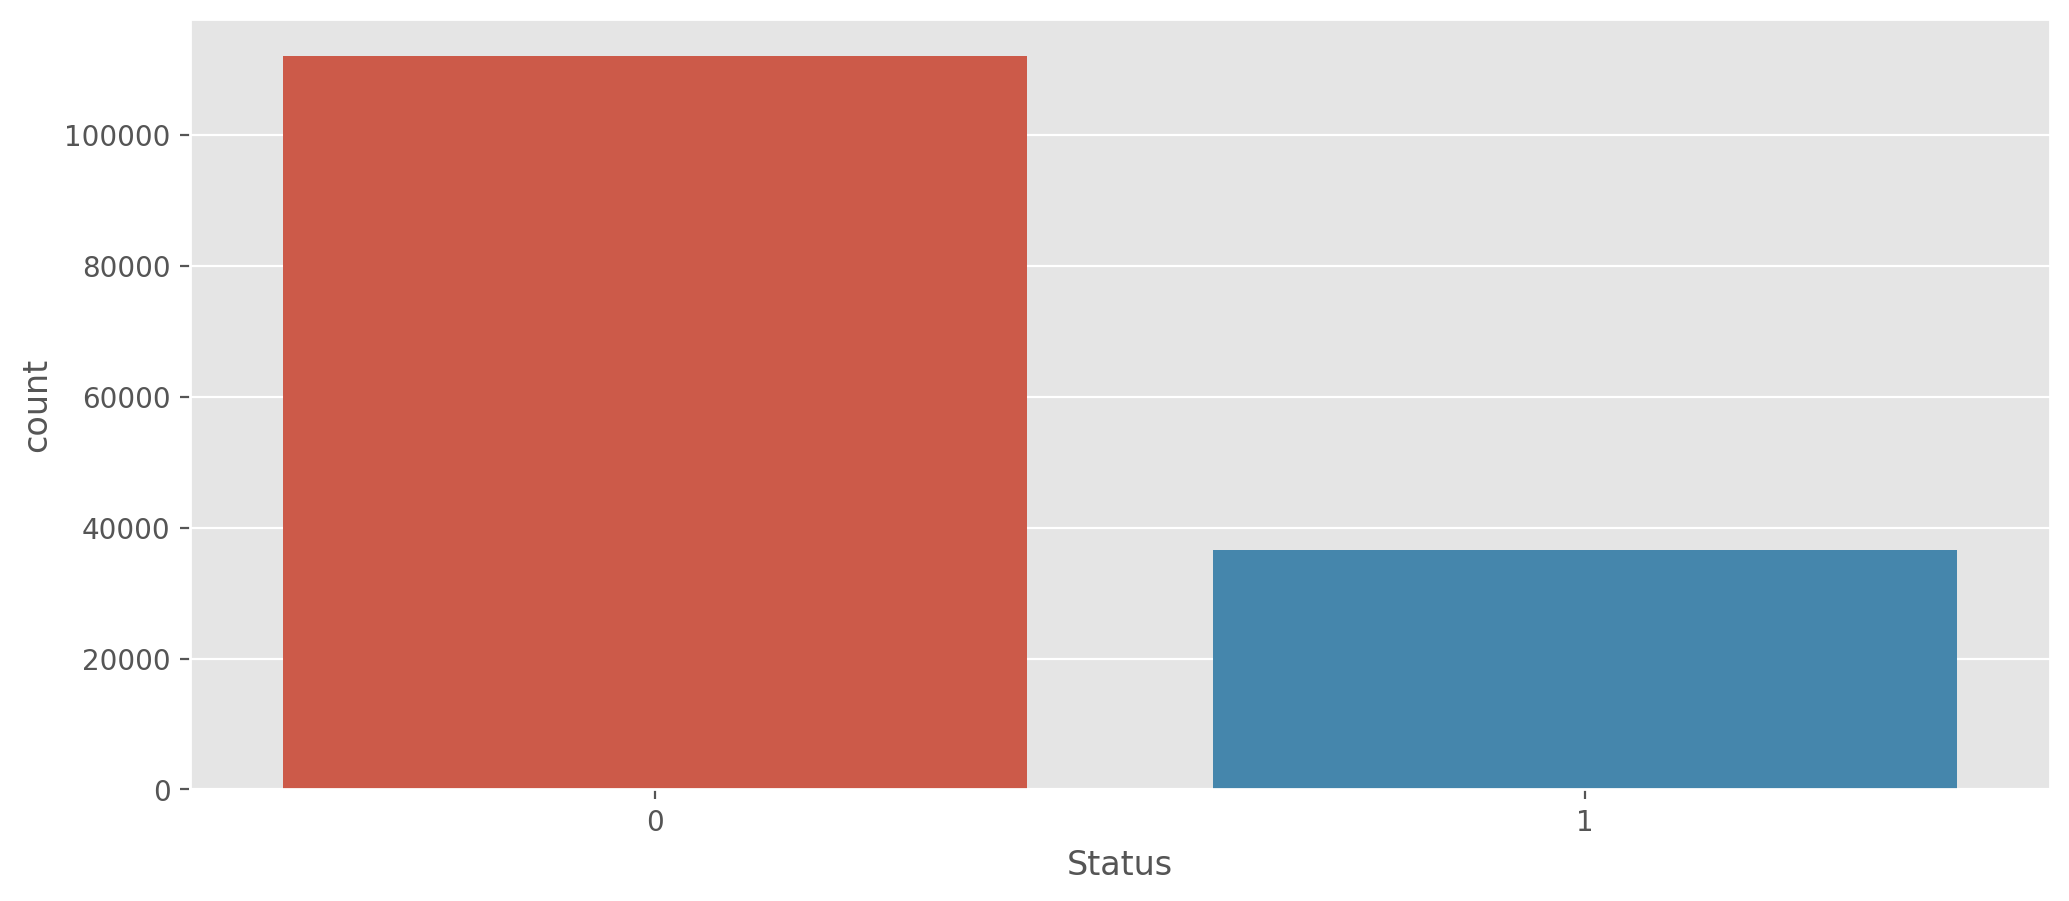

In [14]:
# count of status
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = df['Status'])

In [15]:
df.Status.value_counts(normalize = True)

Status
0    0.753555
1    0.246445
Name: proportion, dtype: float64

loan_limit  Status
cf          0         76.0
            1         24.0
ncf         0         67.0
            1         33.0
Name: proportion, dtype: float64


<Axes: xlabel='loan_limit', ylabel='count'>

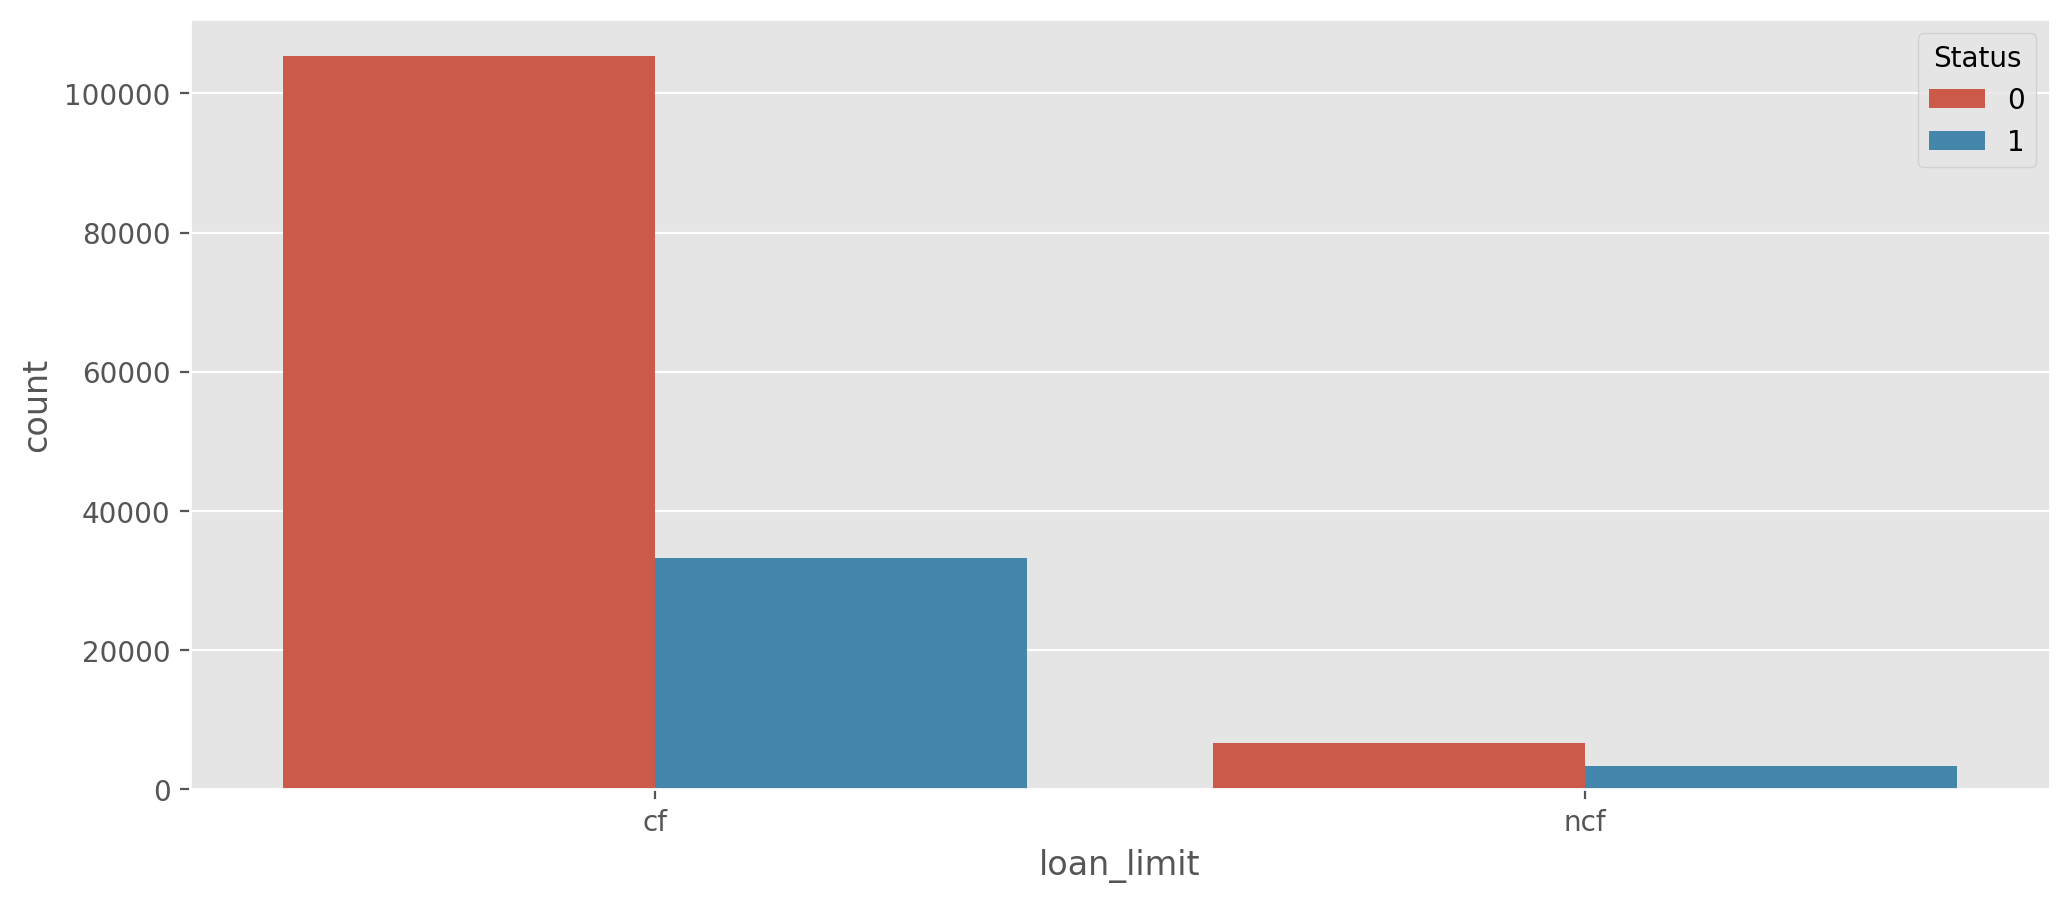

In [16]:
# Loan Limit vs Status
loan_lt = round(df.groupby('loan_limit')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'loan_limit', hue = 'Status',data=df)

Gender             Status
Female             0         75.0
                   1         25.0
Joint              0         81.0
                   1         19.0
Male               0         74.0
                   1         26.0
Sex Not Available  0         71.0
                   1         29.0
Name: proportion, dtype: float64


<Axes: xlabel='Gender', ylabel='count'>

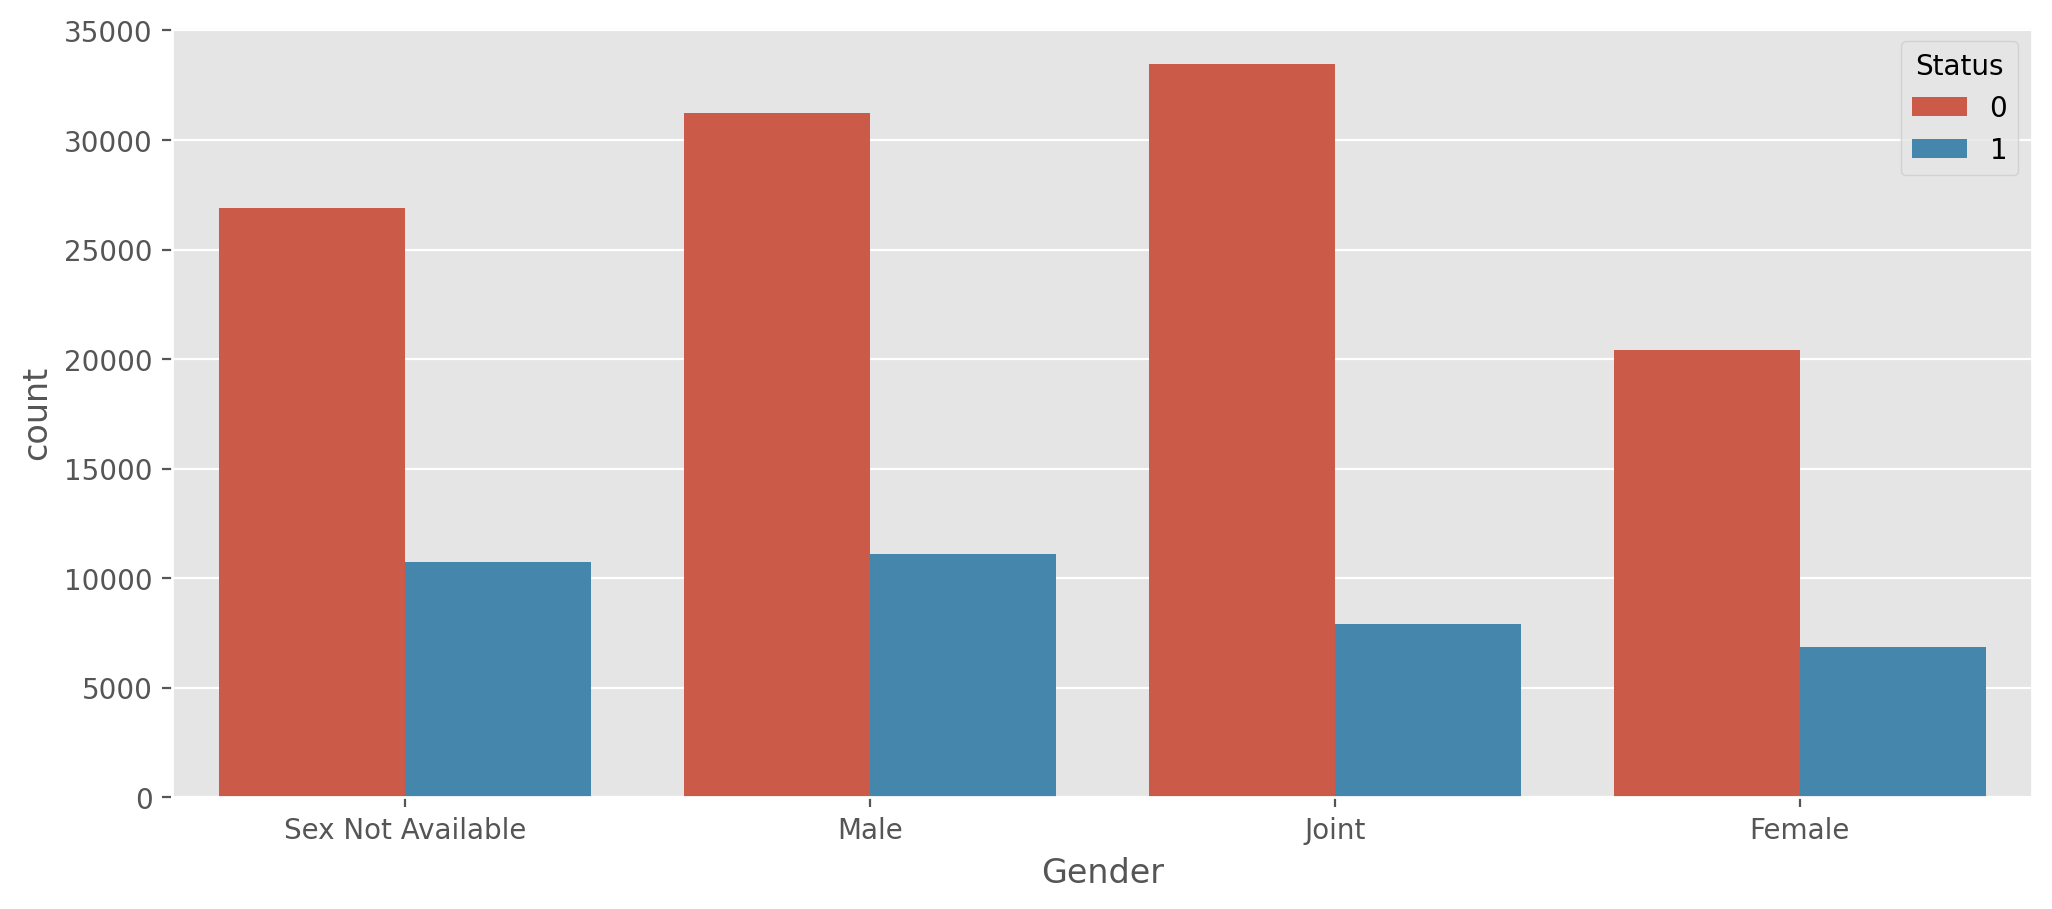

In [17]:
# Gender vs Status
loan_lt = round(df.groupby('Gender')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'Gender', hue = 'Status',data=df)

approv_in_adv  Status
nopre          0         75.0
               1         25.0
pre            0         79.0
               1         21.0
Name: proportion, dtype: float64


<Axes: xlabel='approv_in_adv', ylabel='count'>

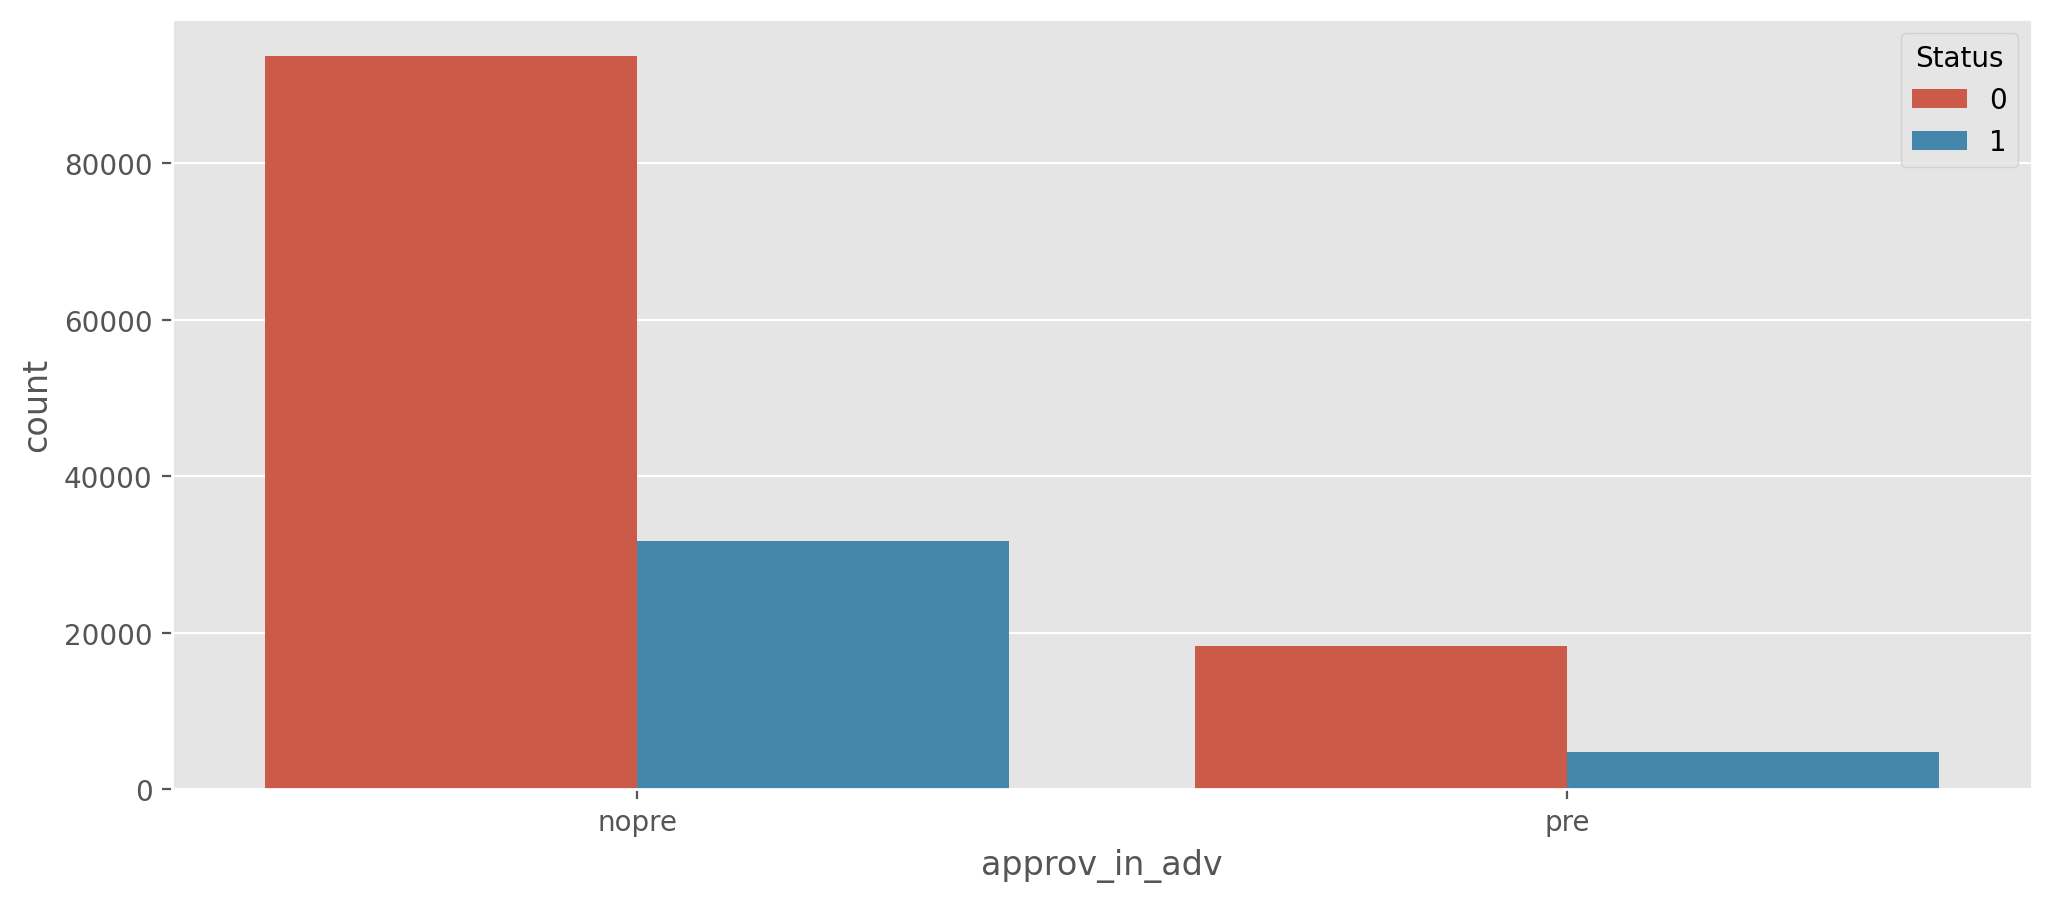

In [18]:
# approv_in_adv vs Status
loan_lt = round(df.groupby('approv_in_adv')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'approv_in_adv', hue = 'Status',data=df)

loan_type  Status
type1      0         77.0
           1         23.0
type2      0         65.0
           1         35.0
type3      0         75.0
           1         25.0
Name: proportion, dtype: float64


<Axes: xlabel='loan_type', ylabel='count'>

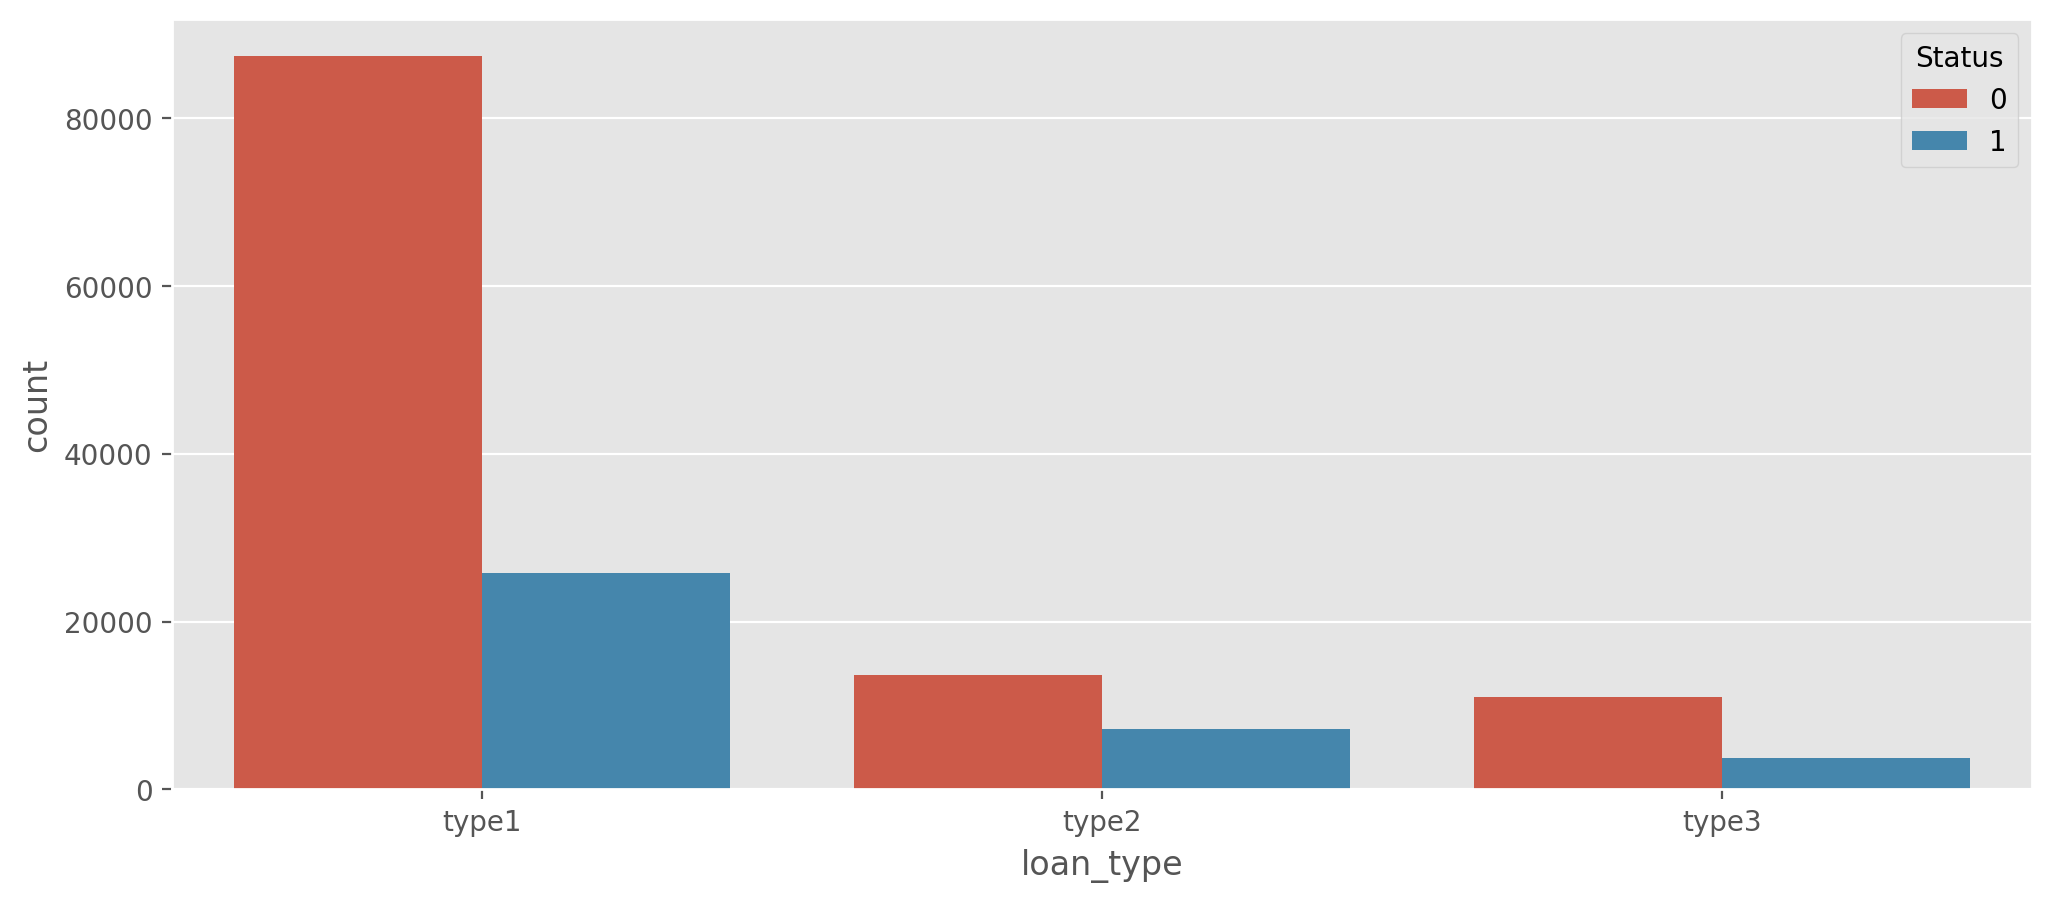

In [19]:
# loan_type vs Status
loan_lt = round(df.groupby('loan_type')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'loan_type', hue = 'Status',data=df)

loan_purpose  Status
p1            0         74.0
              1         26.0
p2            0         67.0
              1         33.0
p3            0         75.0
              1         25.0
p4            0         77.0
              1         23.0
Name: proportion, dtype: float64


<Axes: xlabel='loan_purpose', ylabel='count'>

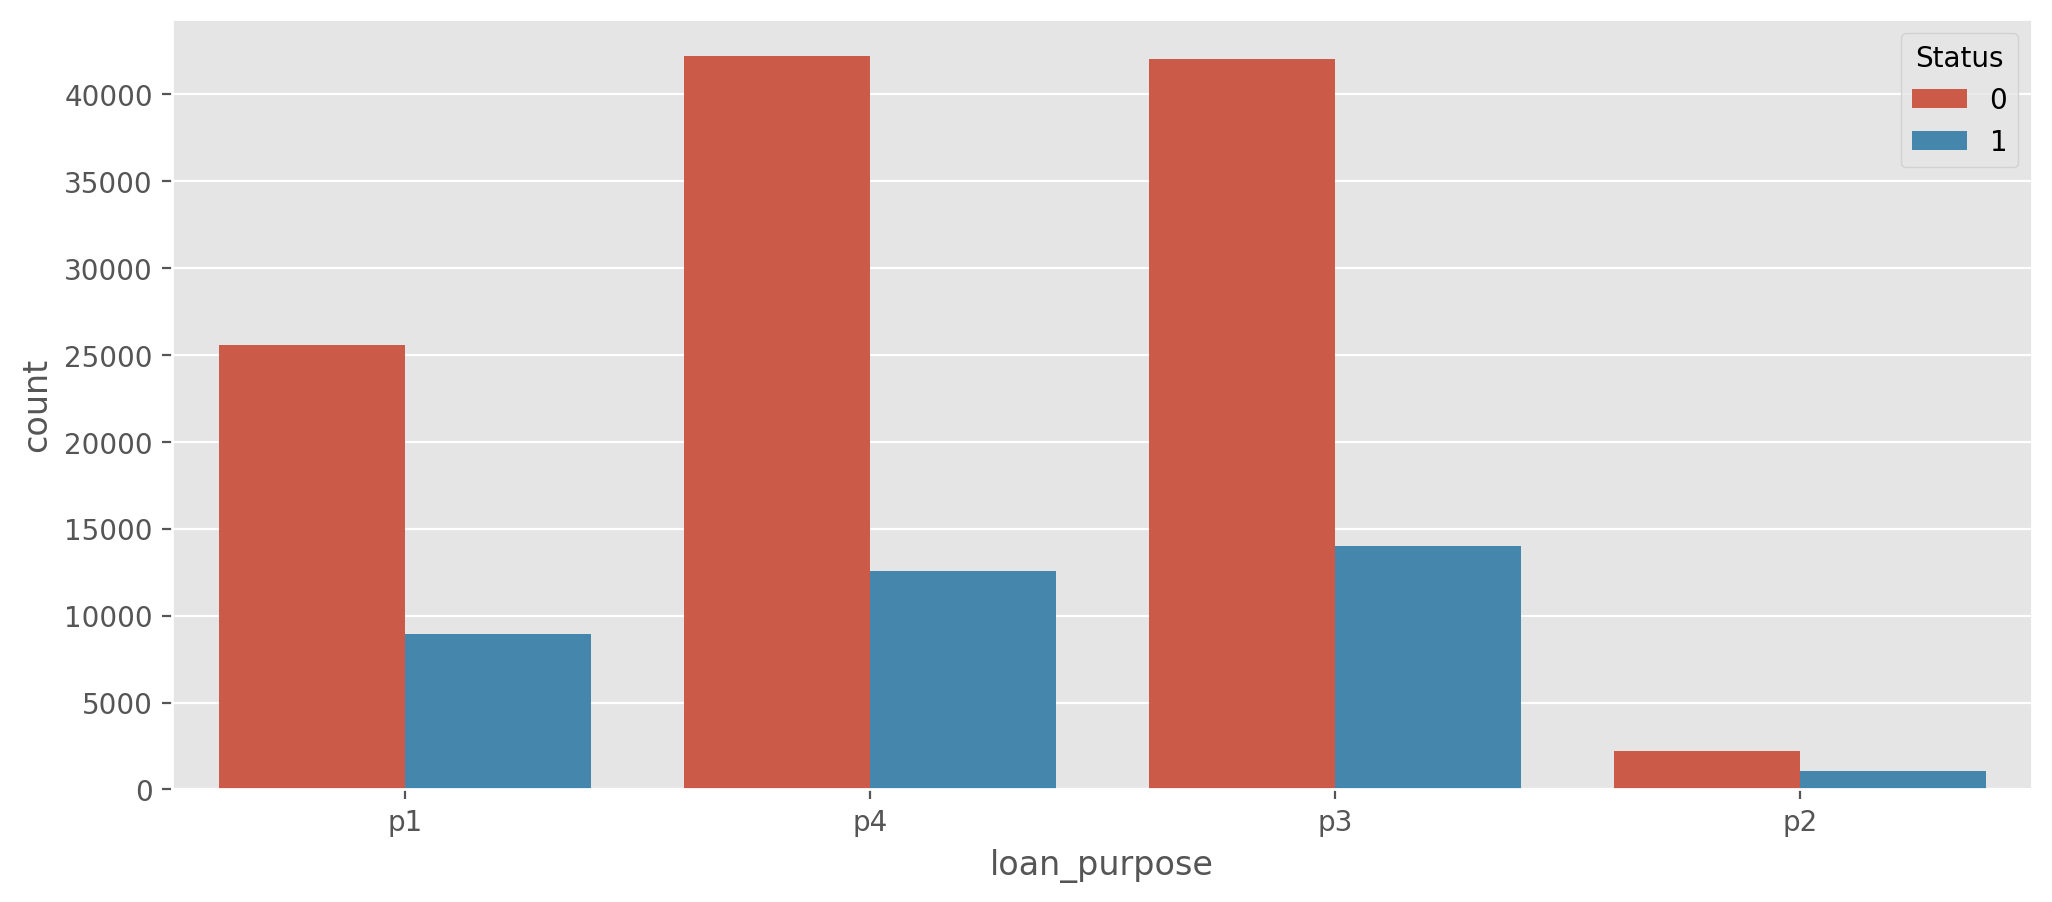

In [20]:
# loan_purpose vs Status
loan_lt = round(df.groupby('loan_purpose')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'loan_purpose', hue = 'Status',data=df)

Credit_Worthiness  Status
l1                 0         76.0
                   1         24.0
l2                 0         68.0
                   1         32.0
Name: proportion, dtype: float64


<Axes: xlabel='Credit_Worthiness', ylabel='count'>

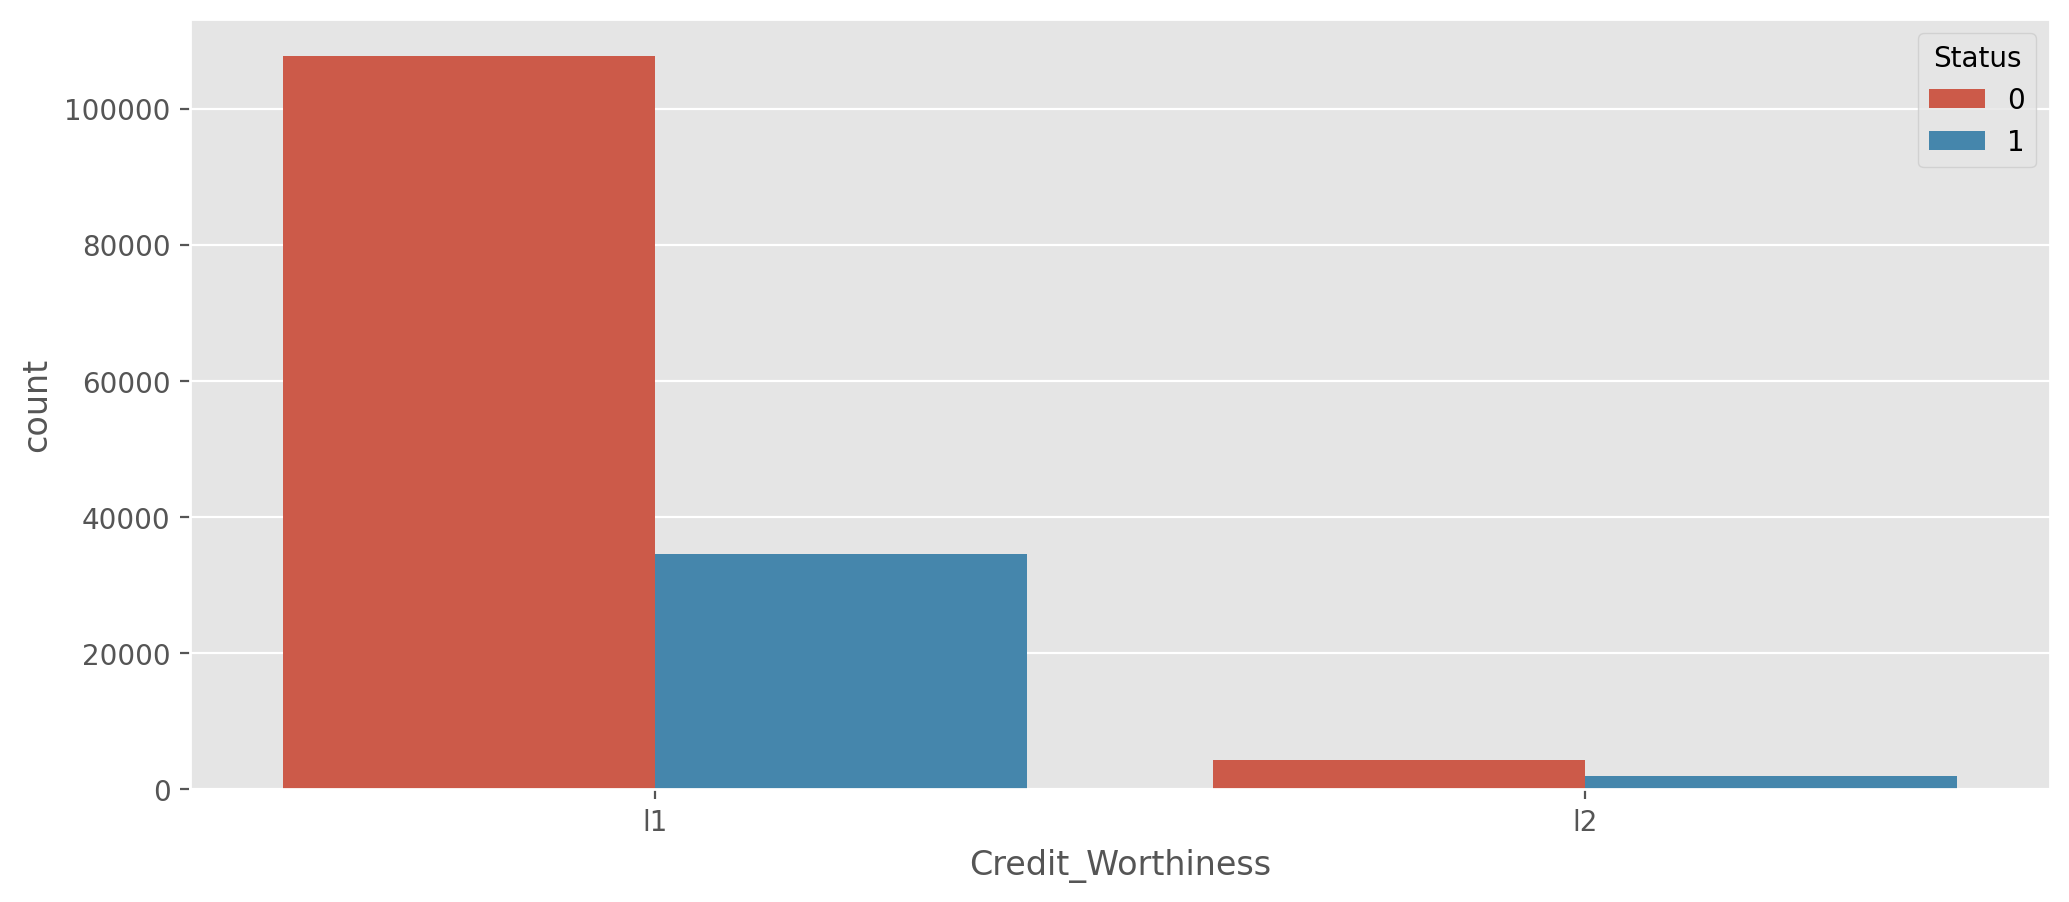

In [21]:
# Credit_Worthiness vs Status
loan_lt = round(df.groupby('Credit_Worthiness')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'Credit_Worthiness', hue = 'Status',data=df)

open_credit  Status
nopc         0         75.0
             1         25.0
opc          0         82.0
             1         18.0
Name: proportion, dtype: float64


<Axes: xlabel='open_credit', ylabel='count'>

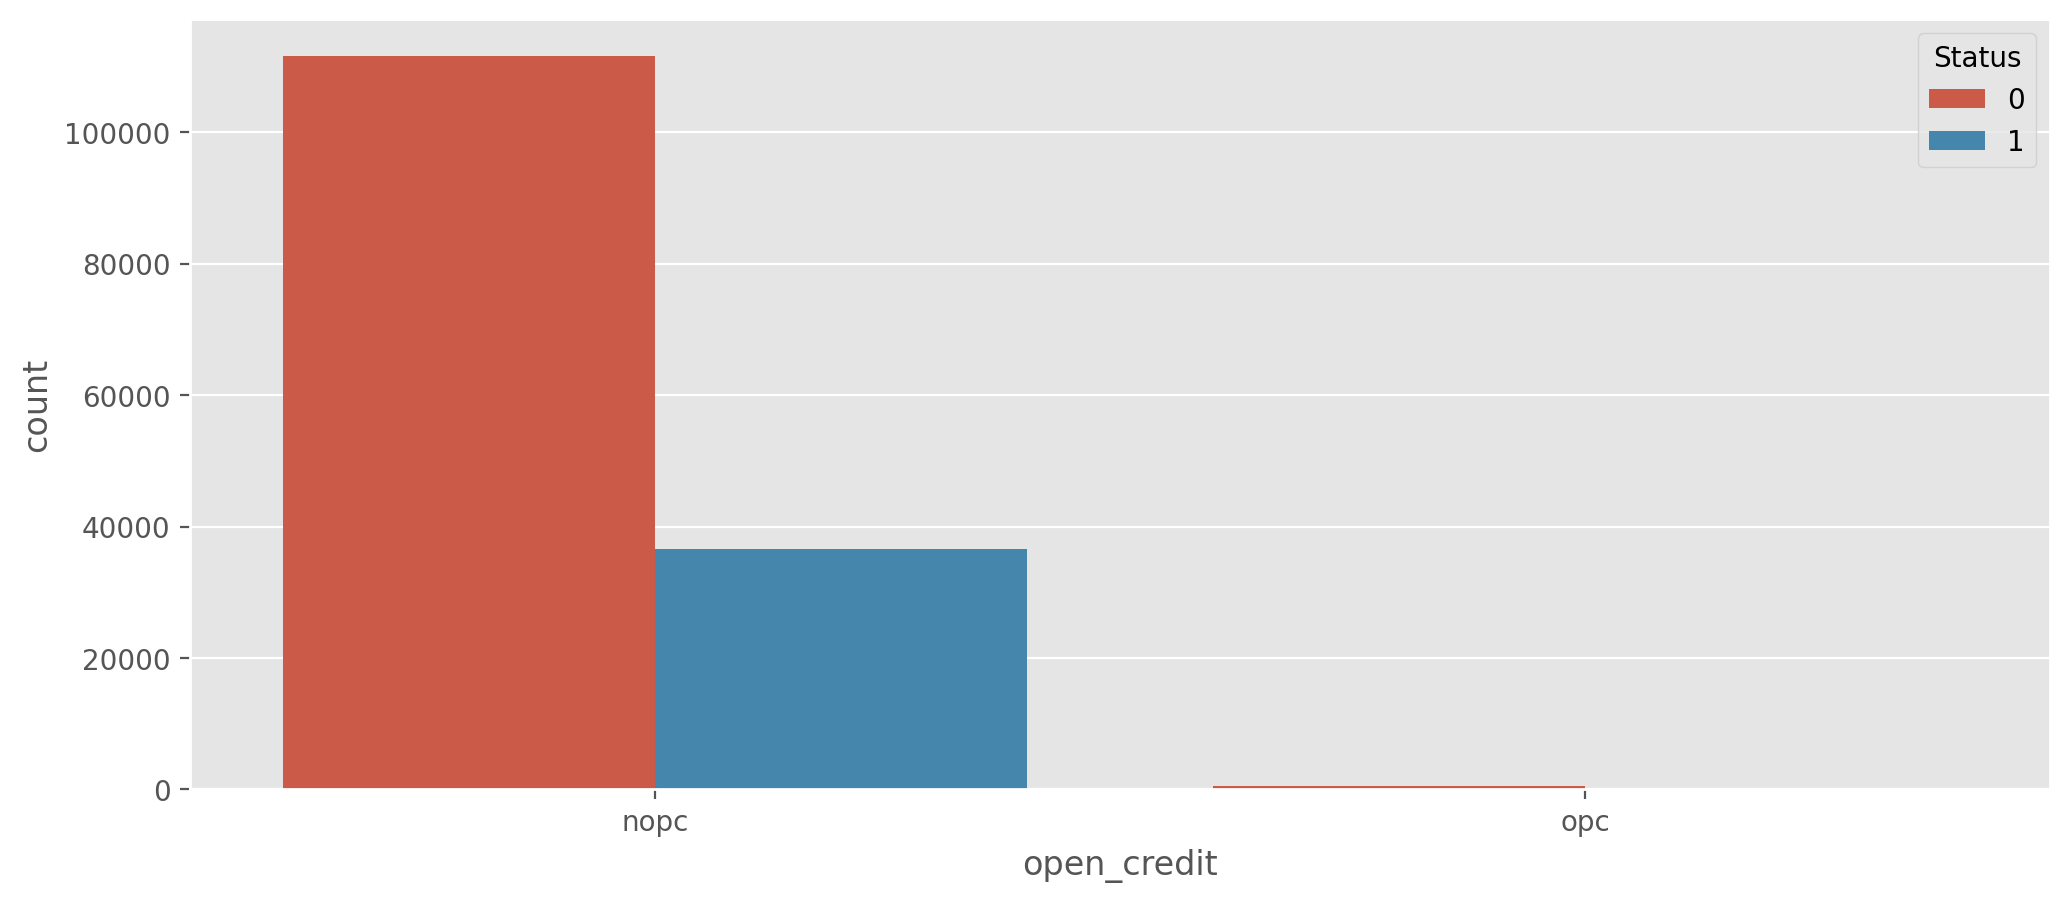

In [22]:
# open_credit vs Status
loan_lt = round(df.groupby('open_credit')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'open_credit', hue = 'Status',data=df)

business_or_commercial  Status
b/c                     0         65.0
                        1         35.0
nob/c                   0         77.0
                        1         23.0
Name: proportion, dtype: float64


<Axes: xlabel='business_or_commercial', ylabel='count'>

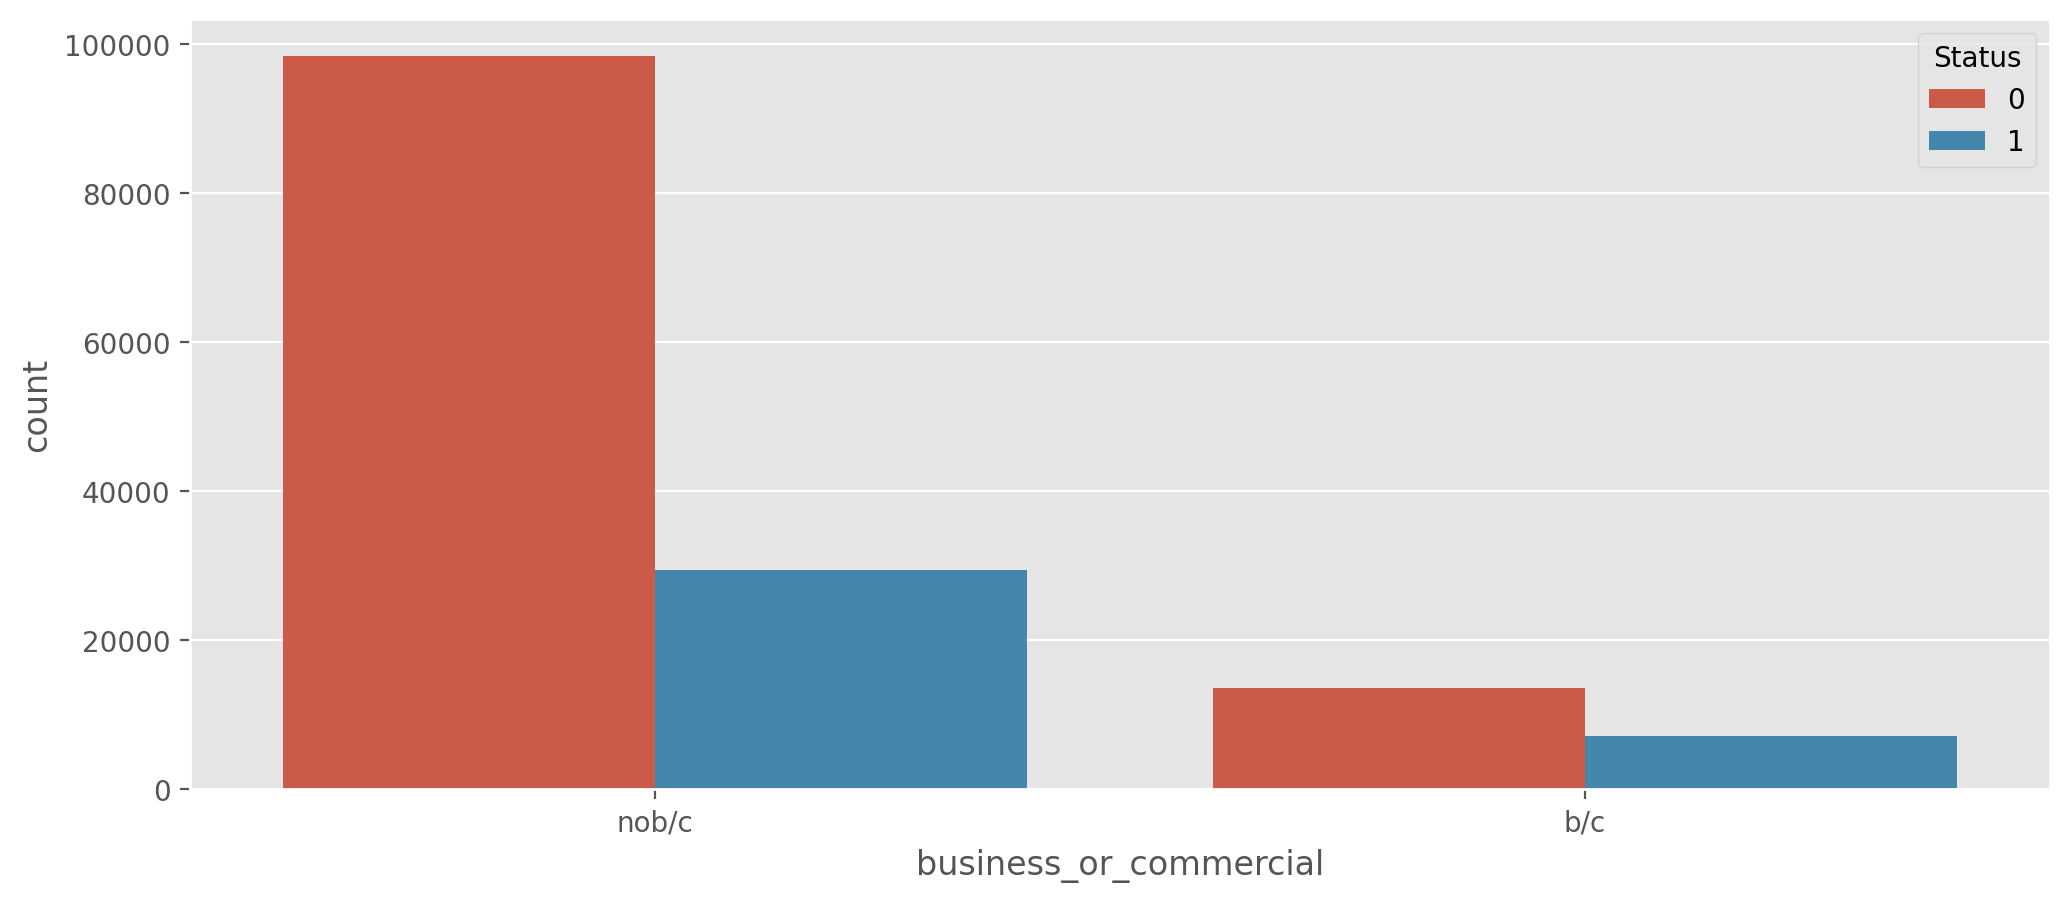

In [23]:
# business_or_commercial vs Status
loan_lt = round(df.groupby('business_or_commercial')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'business_or_commercial', hue = 'Status',data=df)

Neg_ammortization  Status
neg_amm            0         55.0
                   1         45.0
not_neg            0         78.0
                   1         22.0
Name: proportion, dtype: float64


<Axes: xlabel='Neg_ammortization', ylabel='count'>

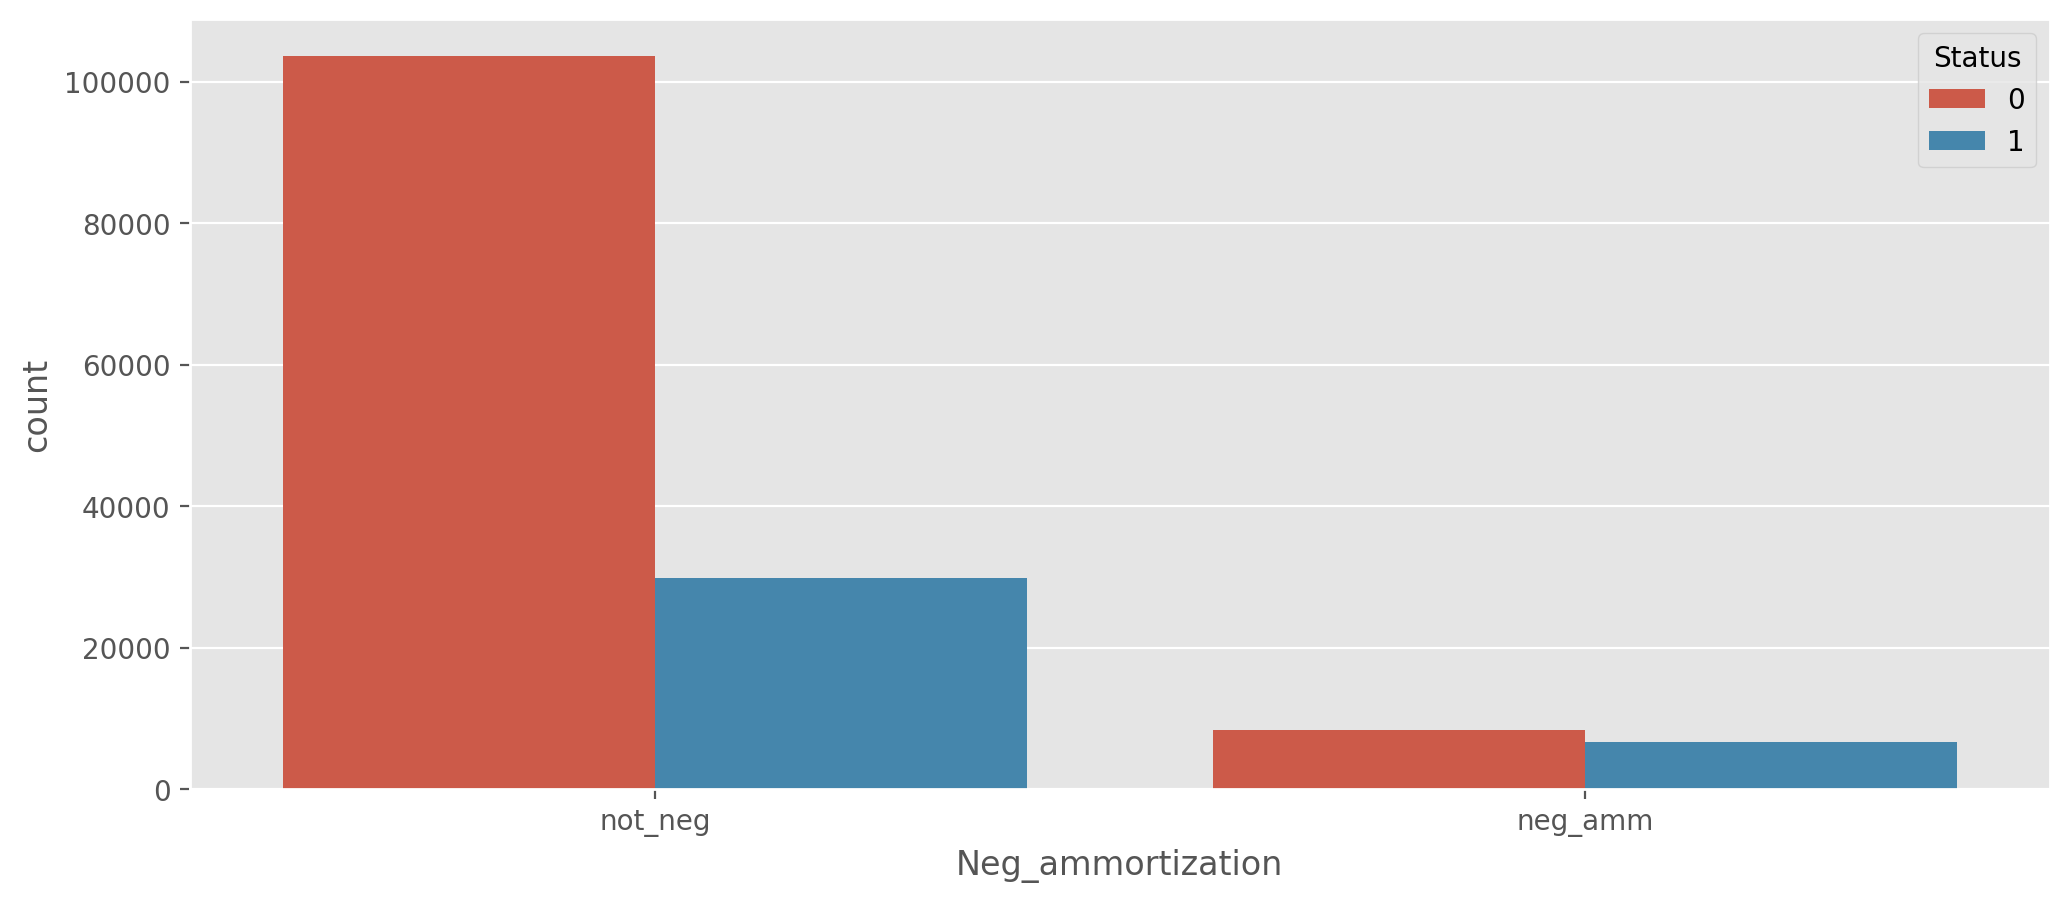

In [24]:
# Neg_ammortization vs Status
loan_lt = round(df.groupby('Neg_ammortization')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'Neg_ammortization', hue = 'Status',data=df)

interest_only  Status
int_only       0         73.0
               1         27.0
not_int        0         75.0
               1         25.0
Name: proportion, dtype: float64


<Axes: xlabel='interest_only', ylabel='count'>

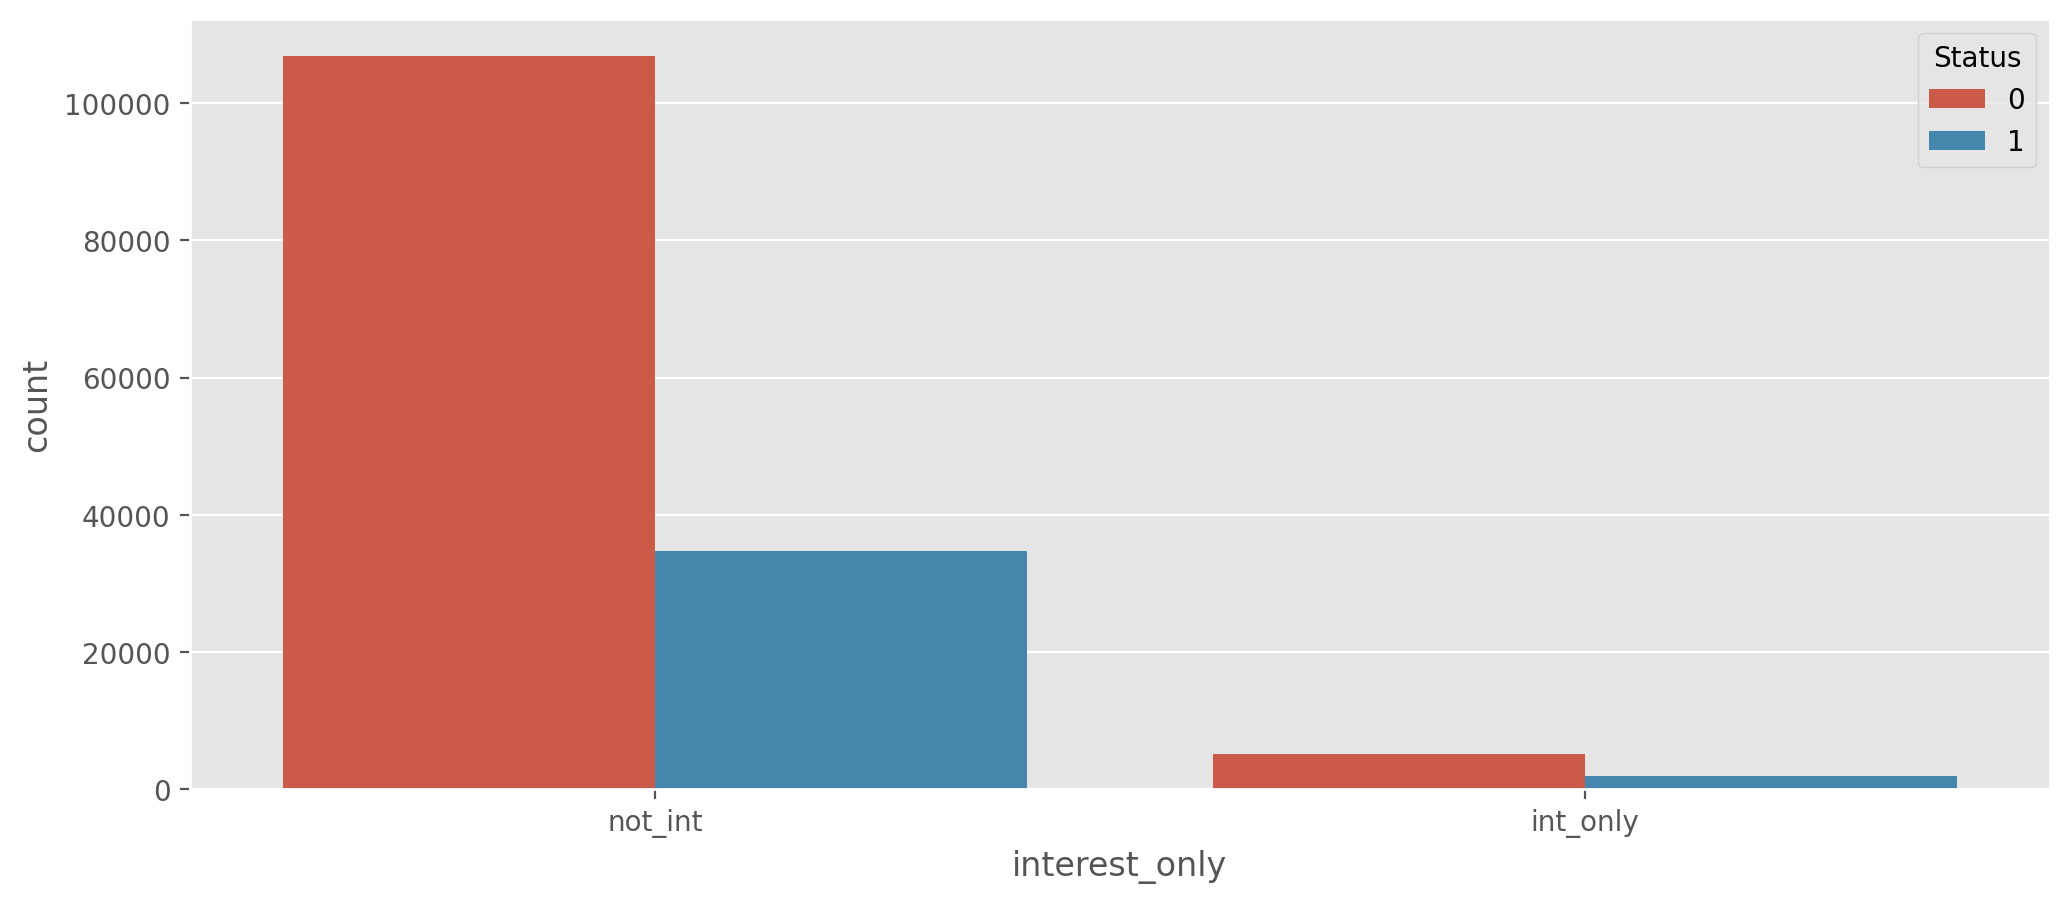

In [25]:
# interest_only vs Status
loan_lt = round(df.groupby('interest_only')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'interest_only', hue = 'Status',data=df)

lump_sum_payment  Status
lpsm              1         78.0
                  0         22.0
not_lpsm          0         77.0
                  1         23.0
Name: proportion, dtype: float64


<Axes: xlabel='lump_sum_payment', ylabel='count'>

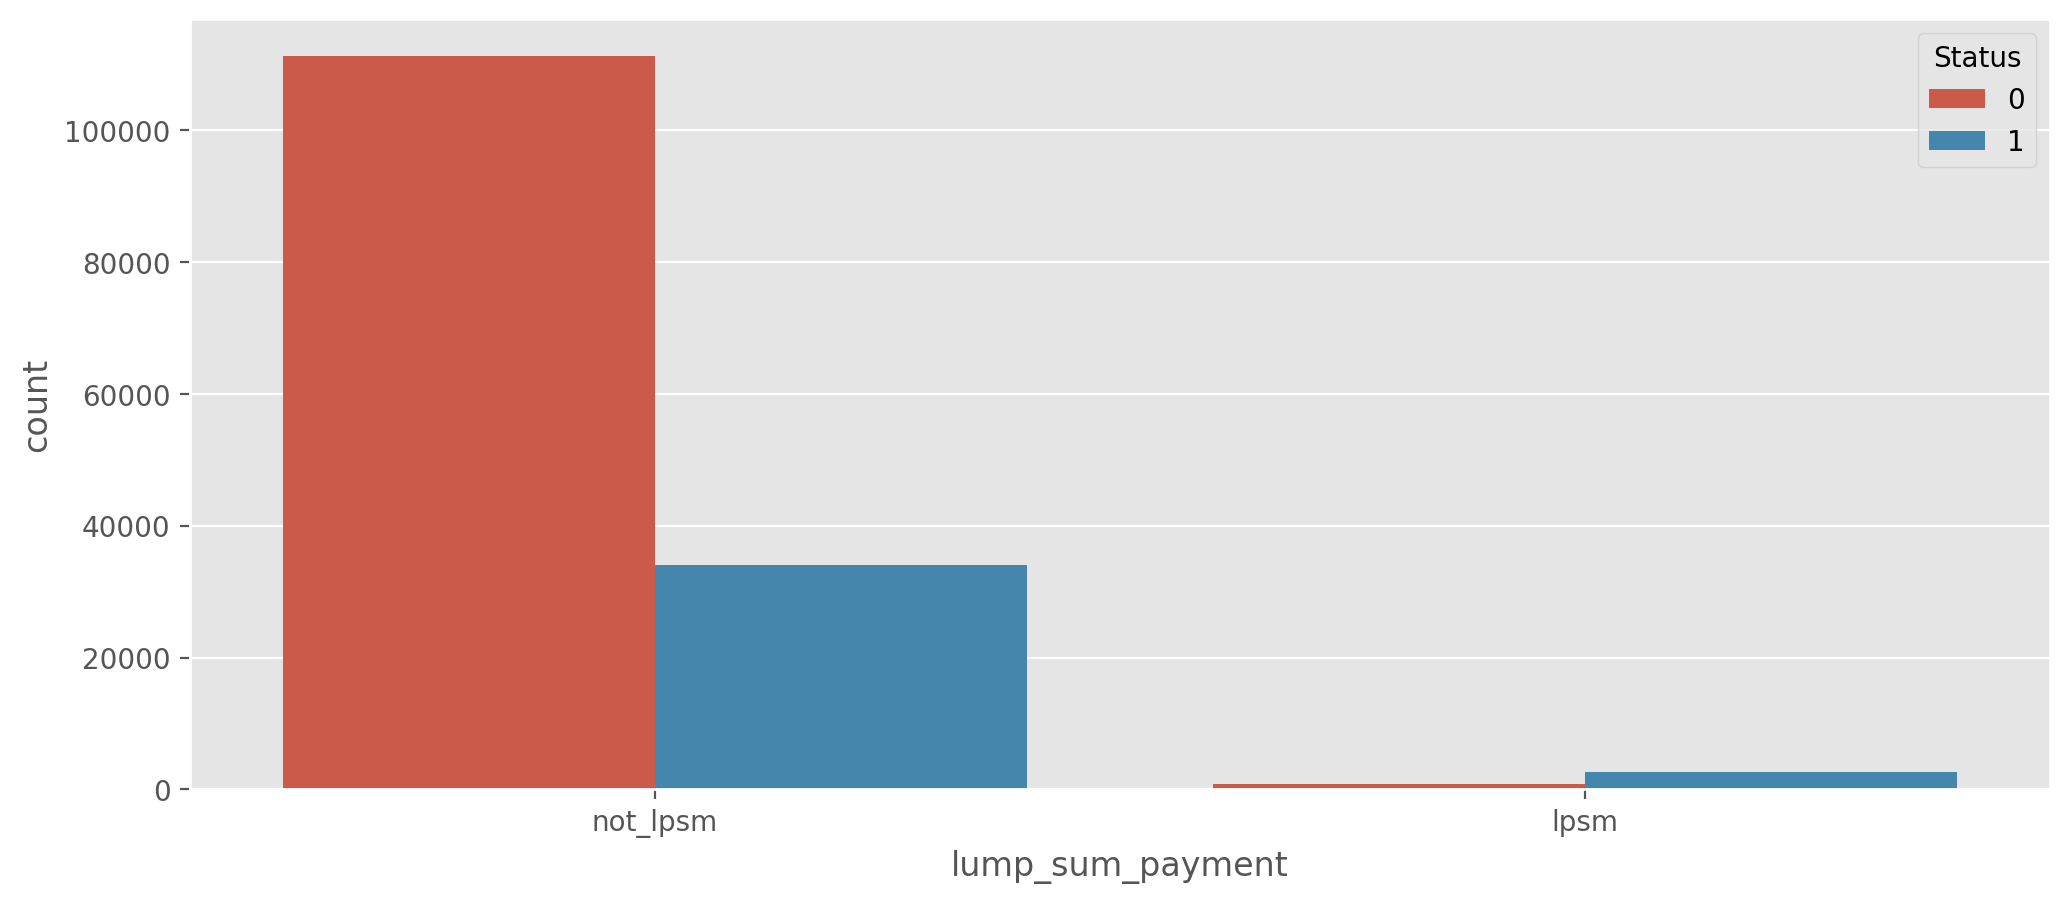

In [26]:
# lump_sum_payment vs Status
loan_lt = round(df.groupby('lump_sum_payment')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'lump_sum_payment', hue = 'Status',data=df)

construction_type  Status
mh                 1         100.0
sb                 0          75.0
                   1          25.0
Name: proportion, dtype: float64


<Axes: xlabel='construction_type', ylabel='count'>

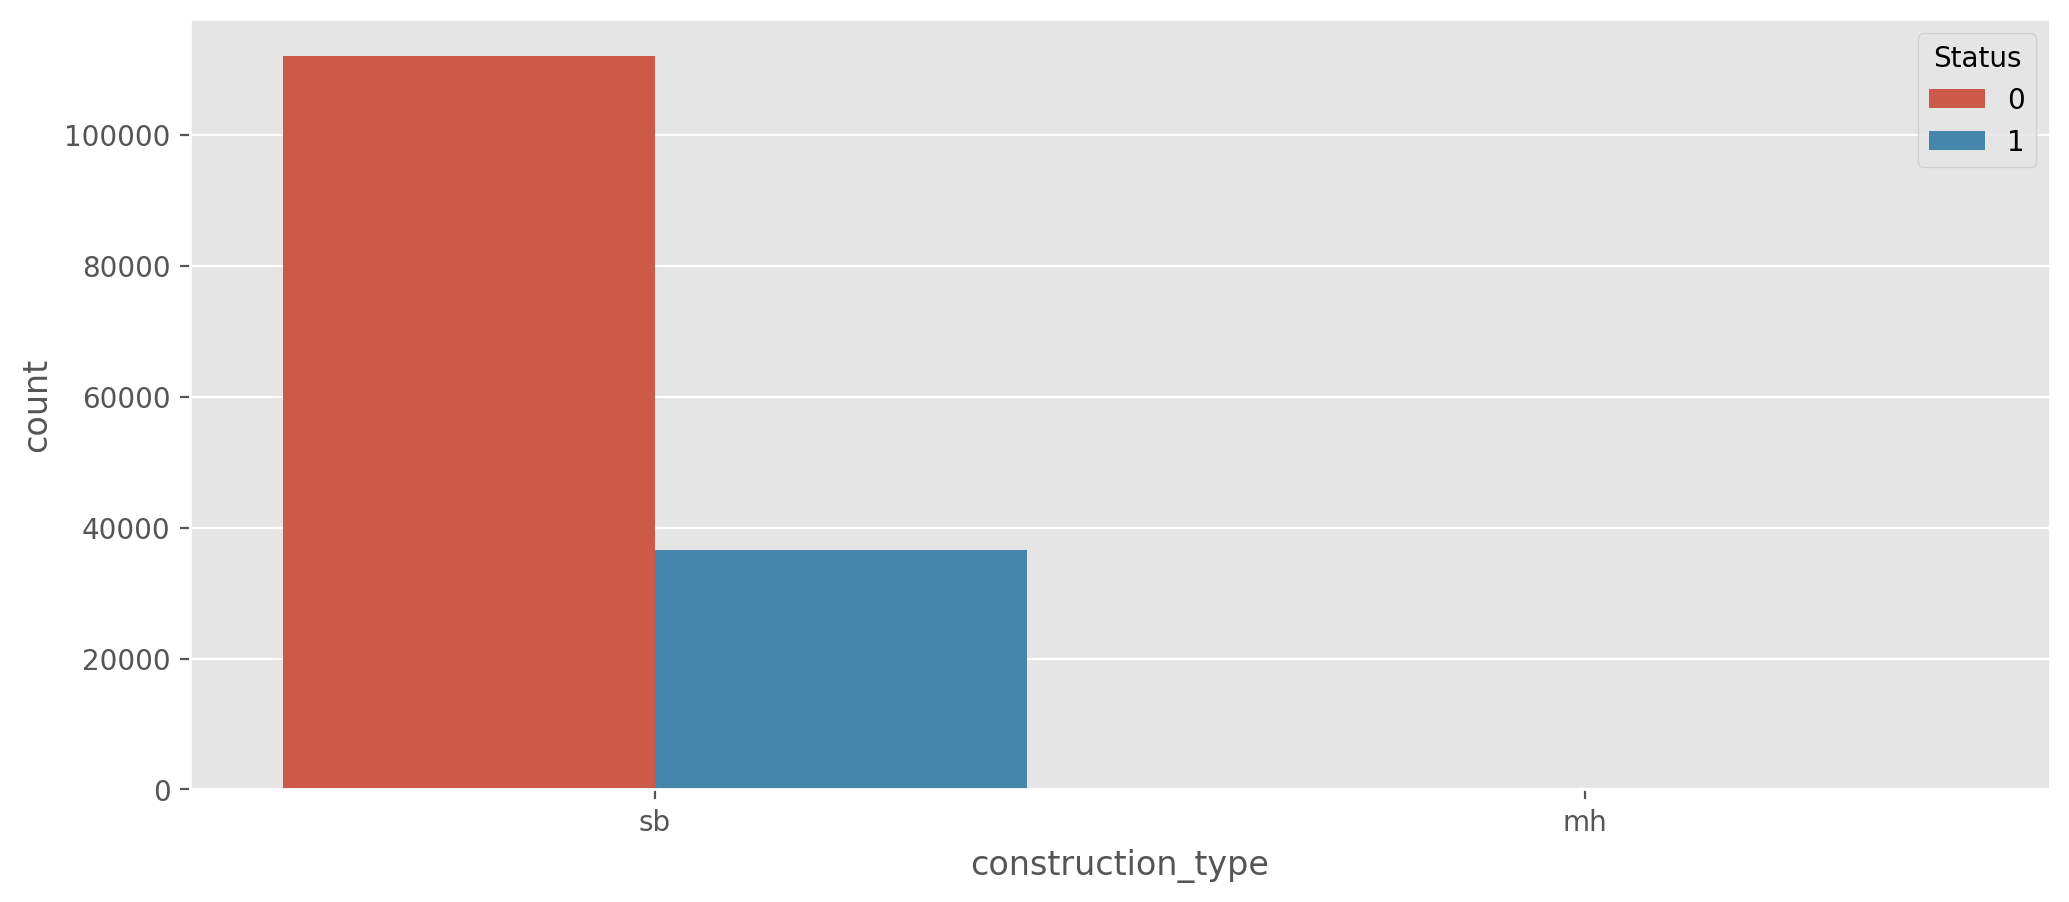

In [27]:
# construction_type vs Status
loan_lt = round(df.groupby('construction_type')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'construction_type', hue = 'Status',data=df)

occupancy_type  Status
ir              0         70.0
                1         30.0
pr              0         76.0
                1         24.0
sr              0         73.0
                1         27.0
Name: proportion, dtype: float64


<Axes: xlabel='occupancy_type', ylabel='count'>

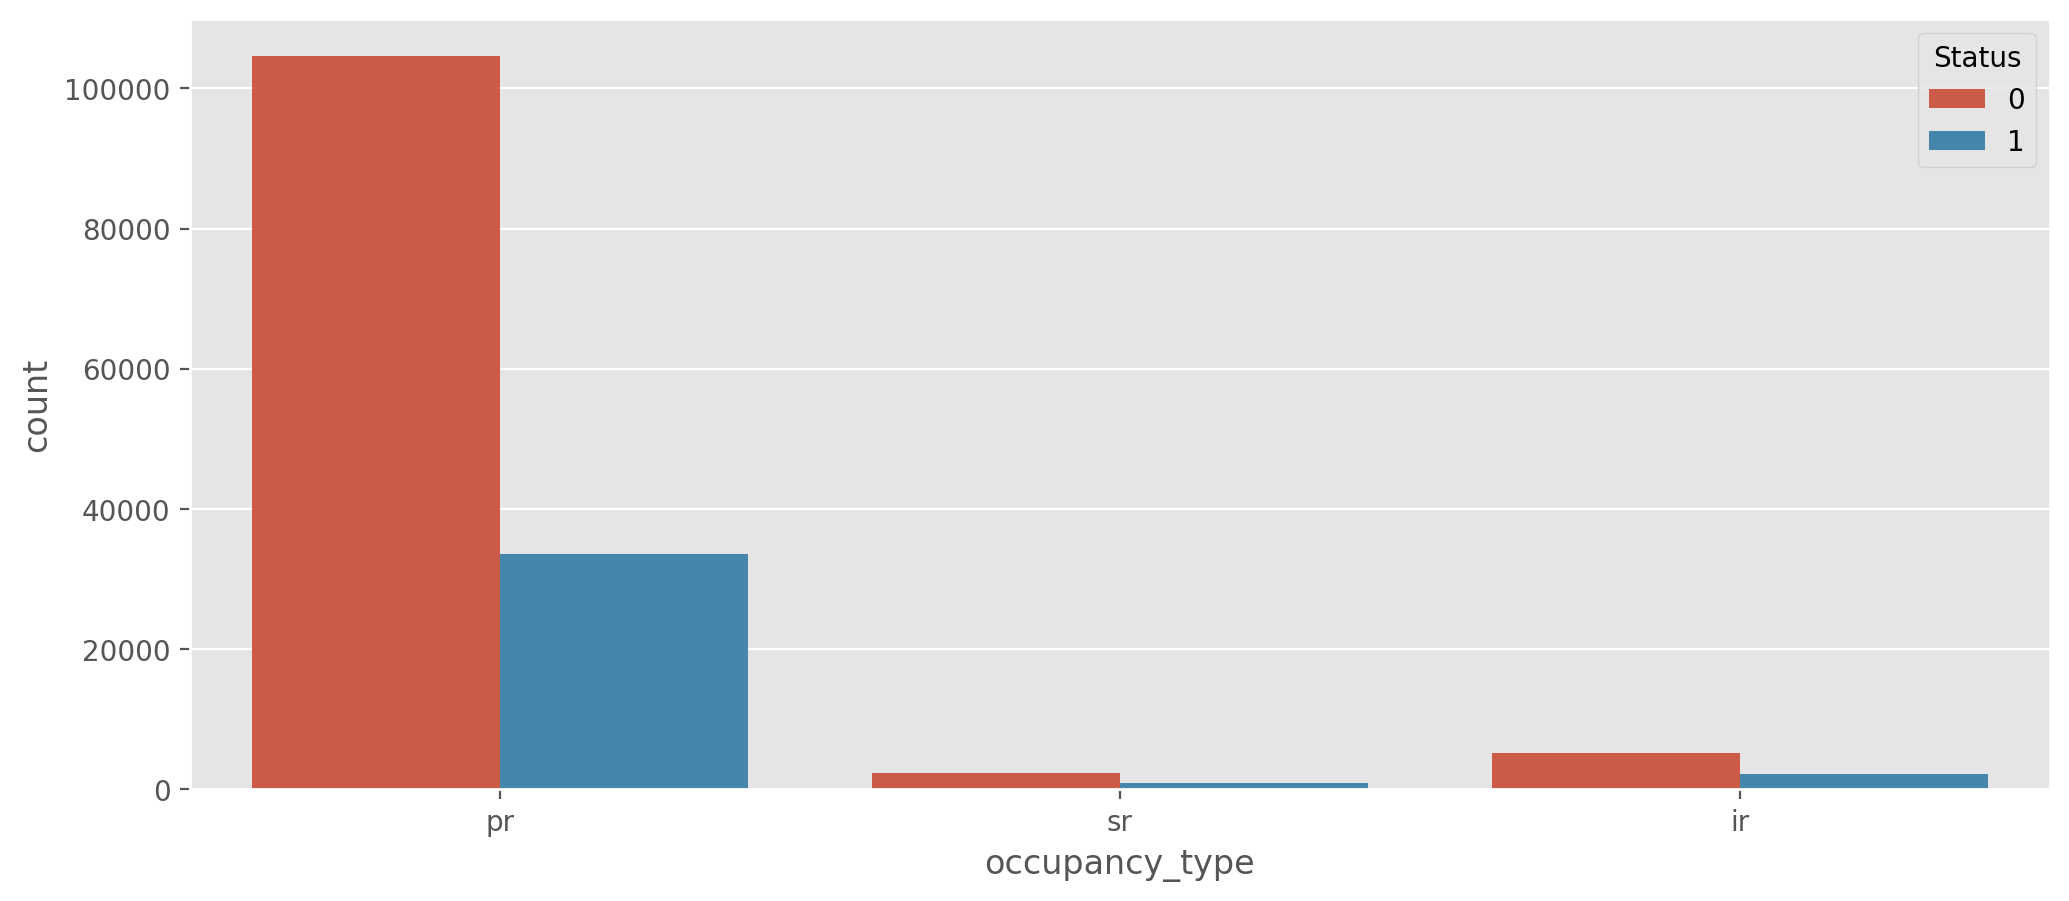

In [28]:
# occupancy_type vs Status
loan_lt = round(df.groupby('occupancy_type')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'occupancy_type', hue = 'Status',data=df)

Secured_by  Status
home        0          75.0
            1          25.0
land        1         100.0
Name: proportion, dtype: float64


<Axes: xlabel='Secured_by', ylabel='count'>

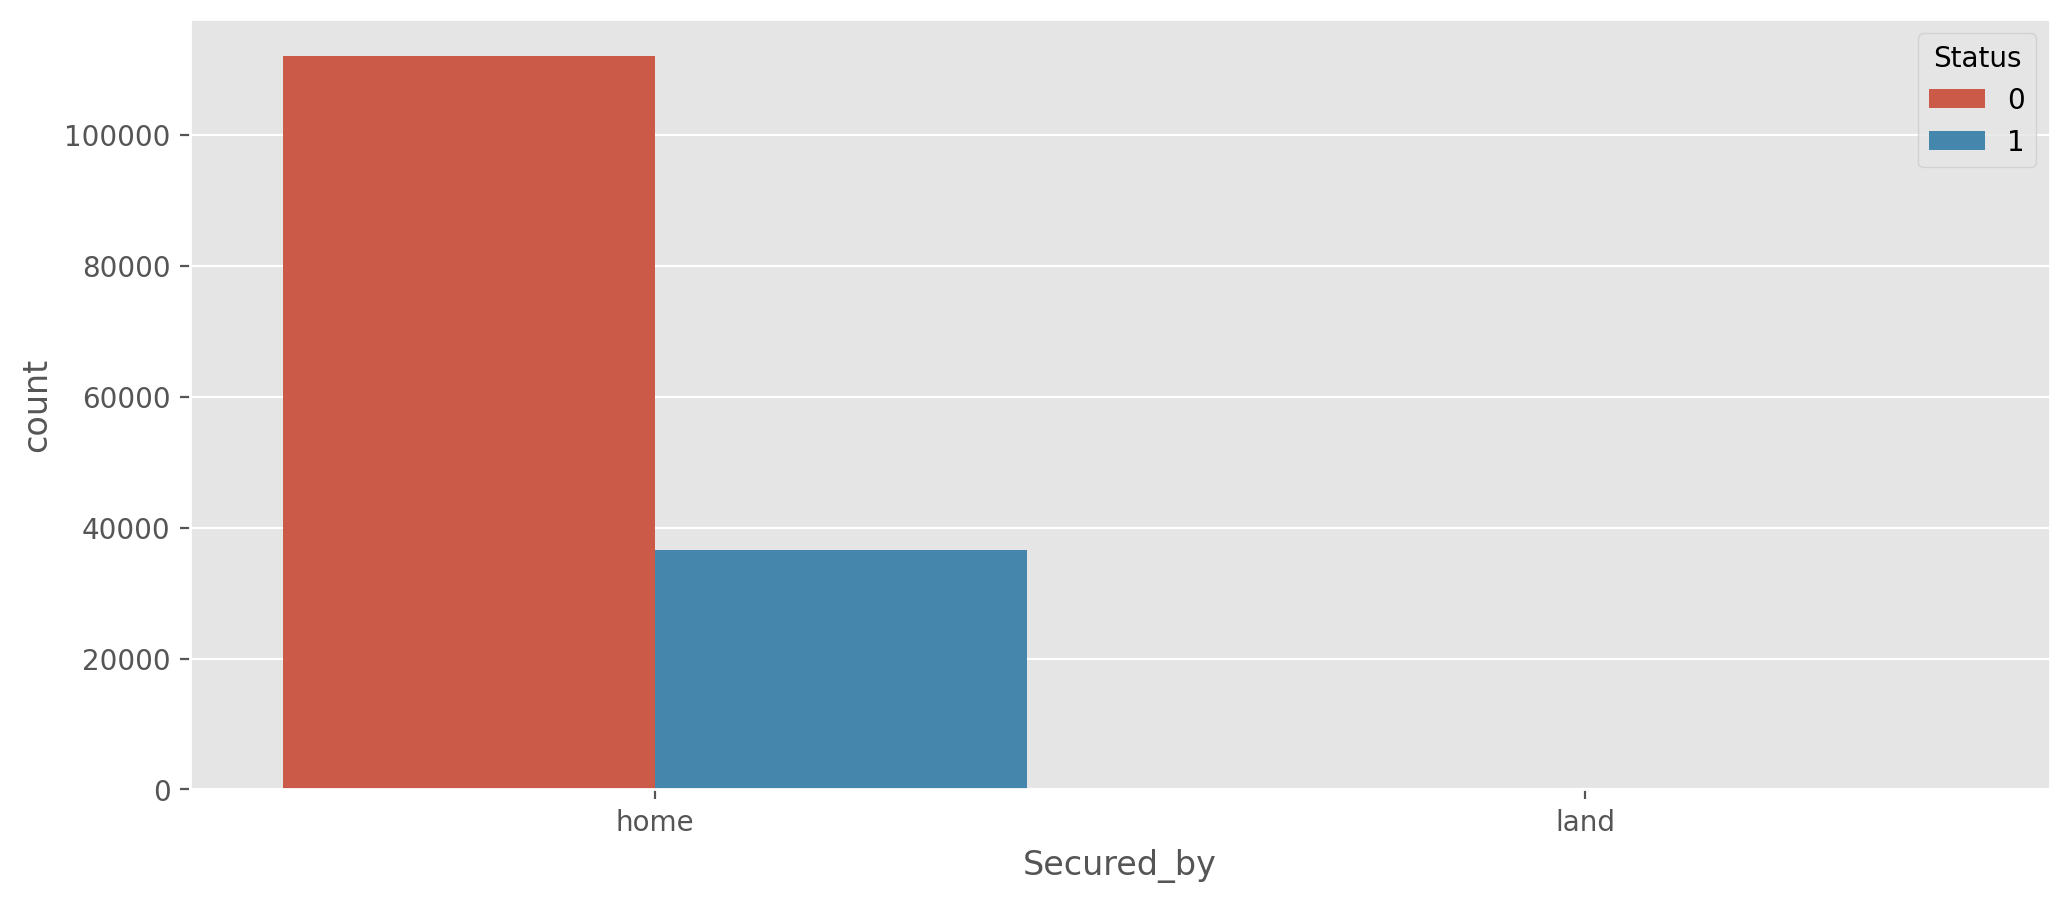

In [29]:
# Secured_by vs Status
loan_lt = round(df.groupby('Secured_by')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'Secured_by', hue = 'Status',data=df)

total_units  Status
1U           0         76.0
             1         24.0
2U           0         65.0
             1         35.0
3U           0         62.0
             1         38.0
4U           0         70.0
             1         30.0
Name: proportion, dtype: float64


<Axes: xlabel='total_units', ylabel='count'>

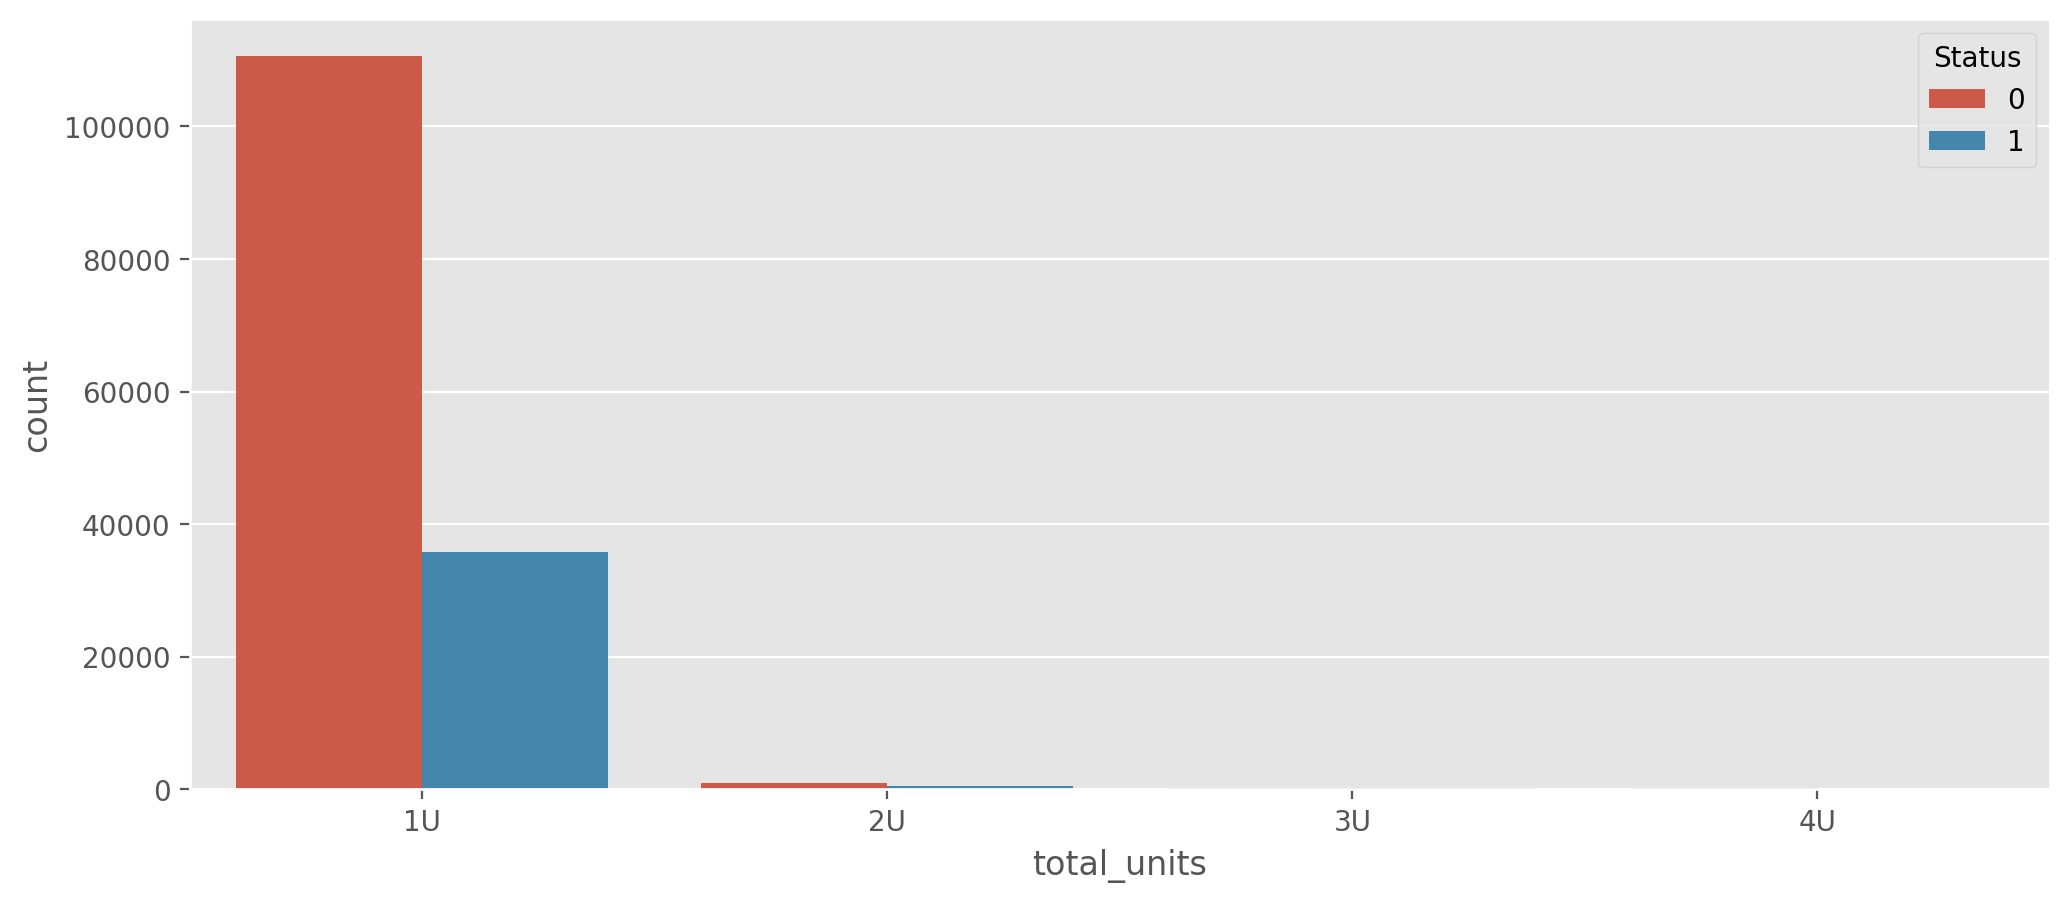

In [30]:
# total_units vs Status
loan_lt = round(df.groupby('total_units')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'total_units', hue = 'Status',data=df)

credit_type  Status
CIB          0          84.0
             1          16.0
CRIF         0          84.0
             1          16.0
EQUI         1         100.0
             0           0.0
EXP          0          84.0
             1          16.0
Name: proportion, dtype: float64


<Axes: xlabel='credit_type', ylabel='count'>

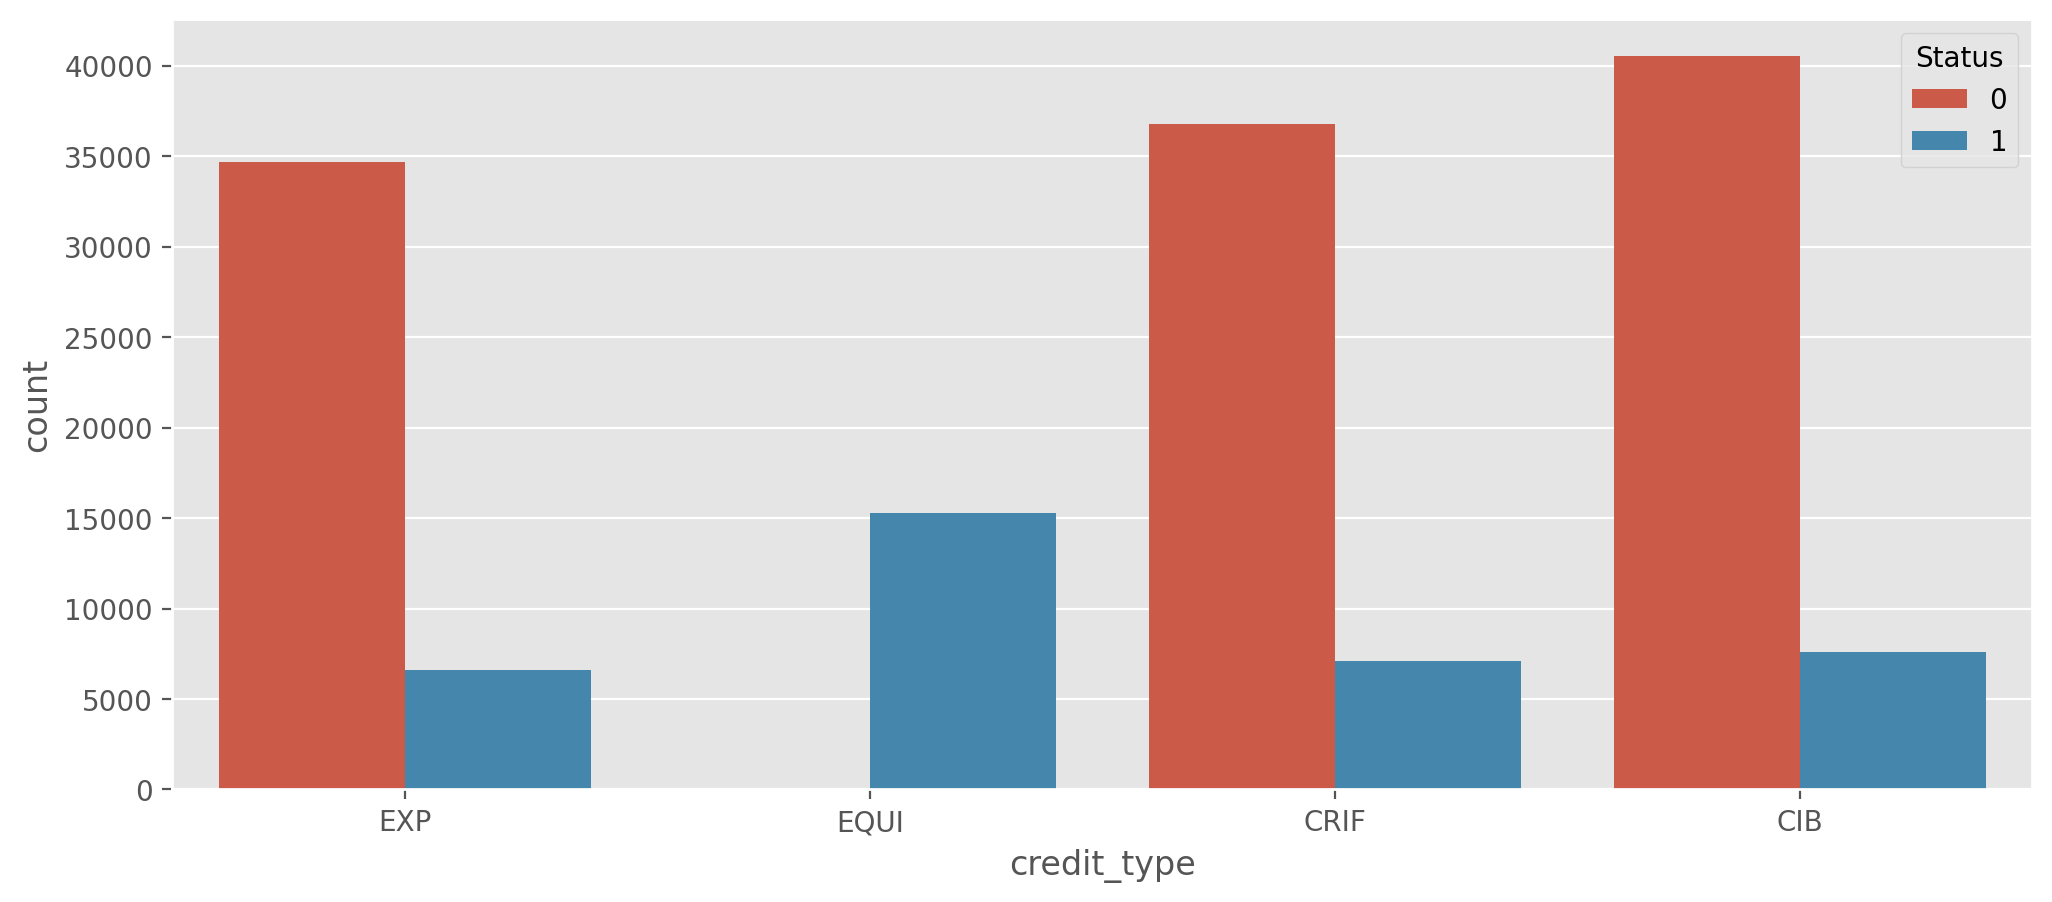

In [31]:
# credit_type vs Status
loan_lt = round(df.groupby('credit_type')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'credit_type', hue = 'Status',data=df)

co-applicant_credit_type  Status
CIB                       0         82.0
                          1         18.0
EXP                       0         69.0
                          1         31.0
Name: proportion, dtype: float64


<Axes: xlabel='co-applicant_credit_type', ylabel='count'>

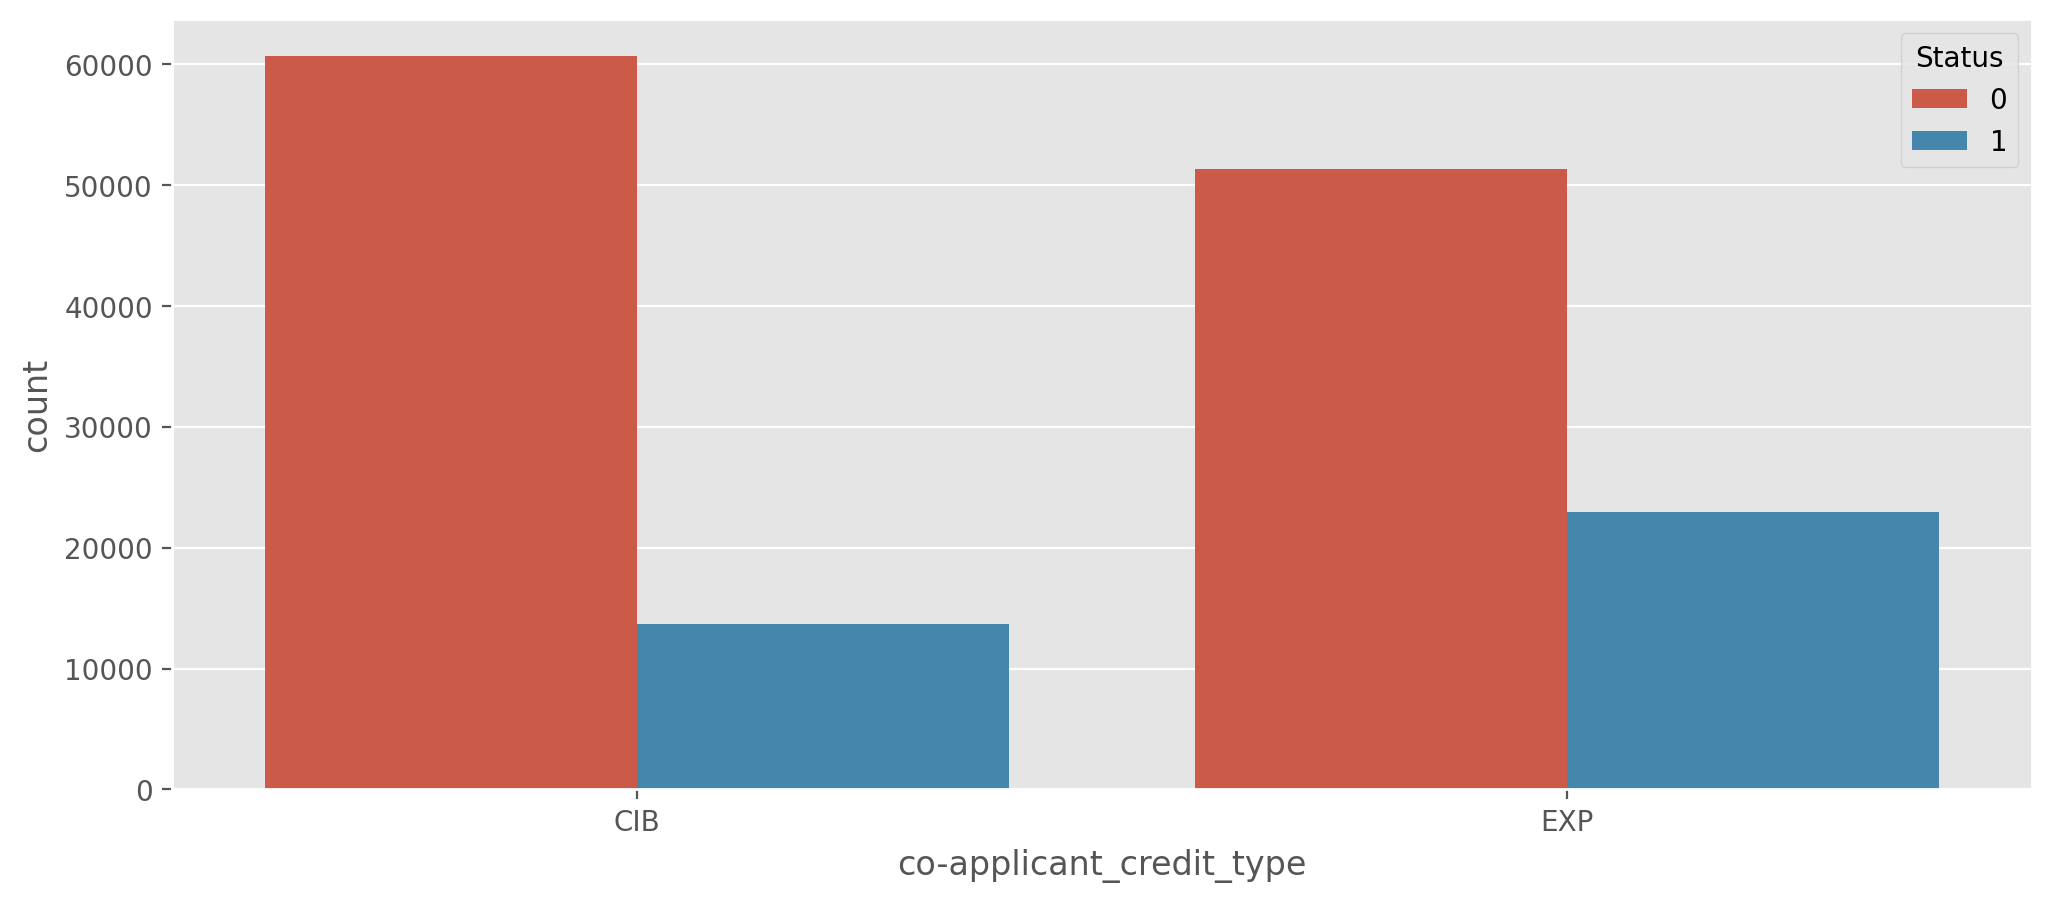

In [32]:
# co-applicant_credit_type vs Status
loan_lt = round(df.groupby('co-applicant_credit_type')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'co-applicant_credit_type', hue = 'Status',data=df)

age    Status
25-34  0         78.0
       1         22.0
35-44  0         78.0
       1         22.0
45-54  0         76.0
       1         24.0
55-64  0         74.0
       1         26.0
65-74  0         73.0
       1         27.0
<25    0         71.0
       1         29.0
>74    0         70.0
       1         30.0
Name: proportion, dtype: float64


<Axes: xlabel='age', ylabel='count'>

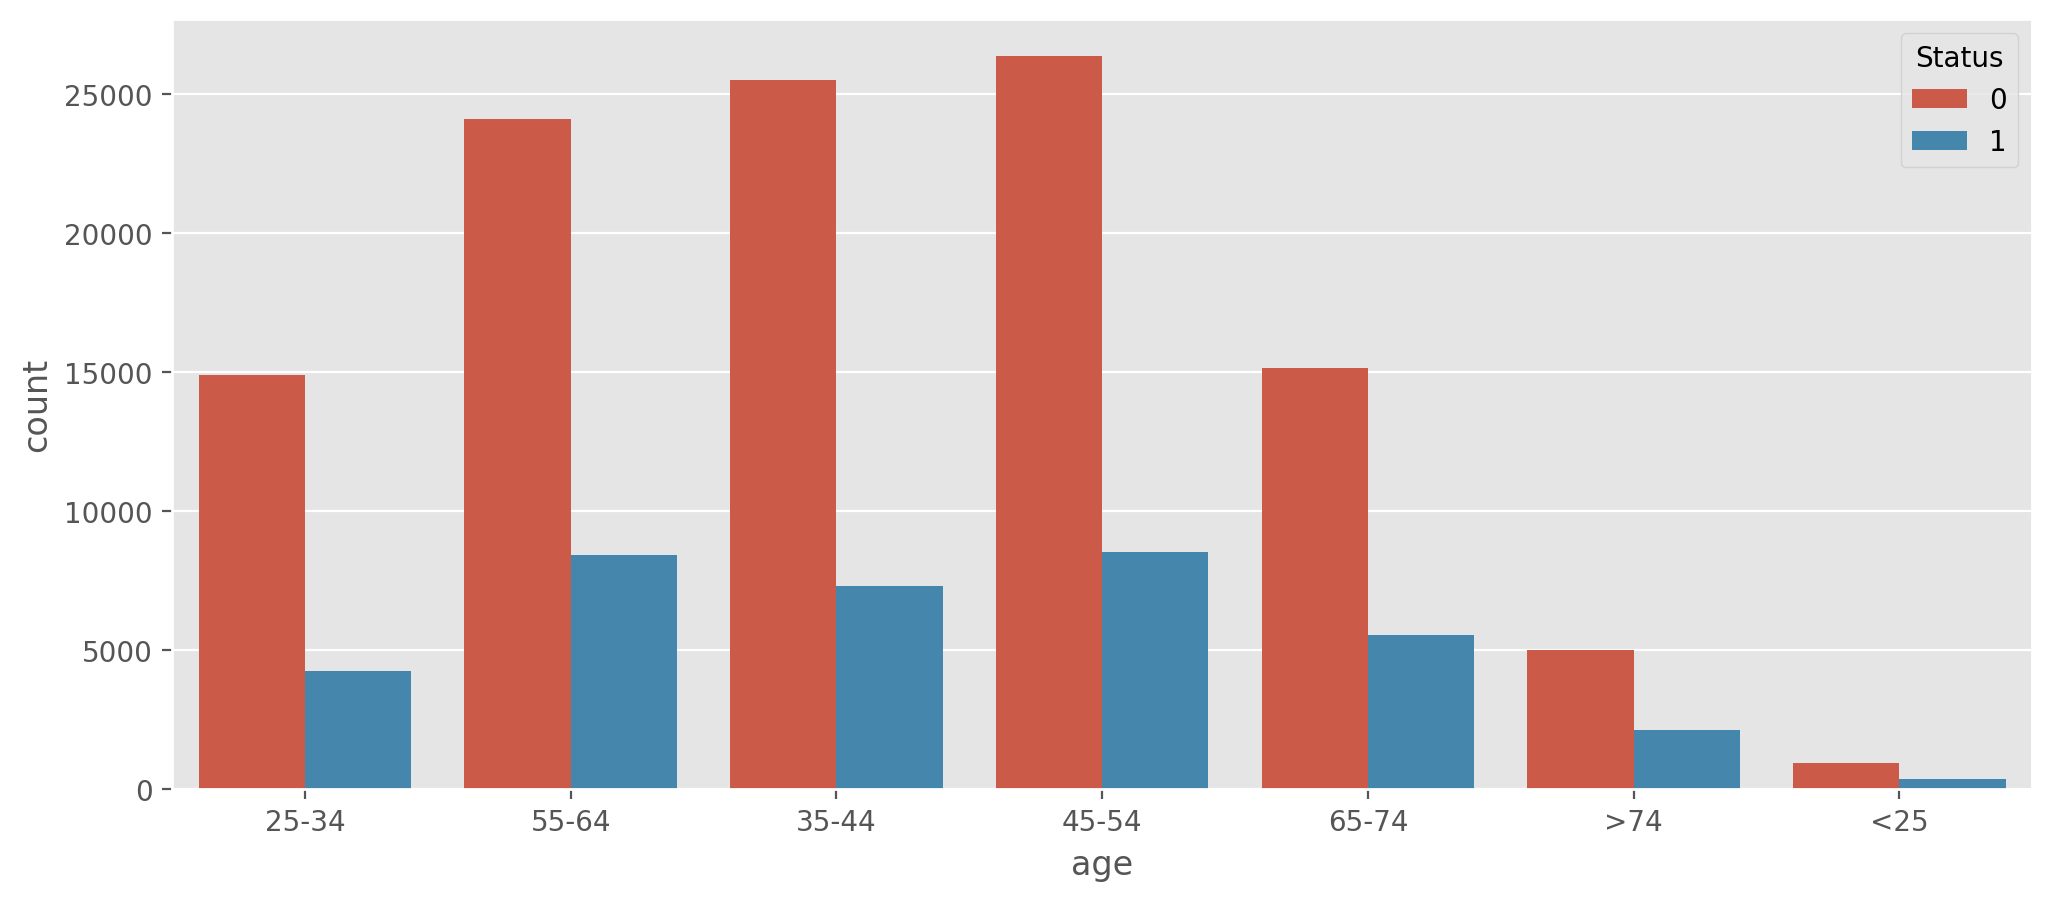

In [33]:
# age vs Status
loan_lt = round(df.groupby('age')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'age', hue = 'Status',data=df)

submission_of_application  Status
not_inst                   0         82.0
                           1         18.0
to_inst                    0         71.0
                           1         29.0
Name: proportion, dtype: float64


<Axes: xlabel='submission_of_application', ylabel='count'>

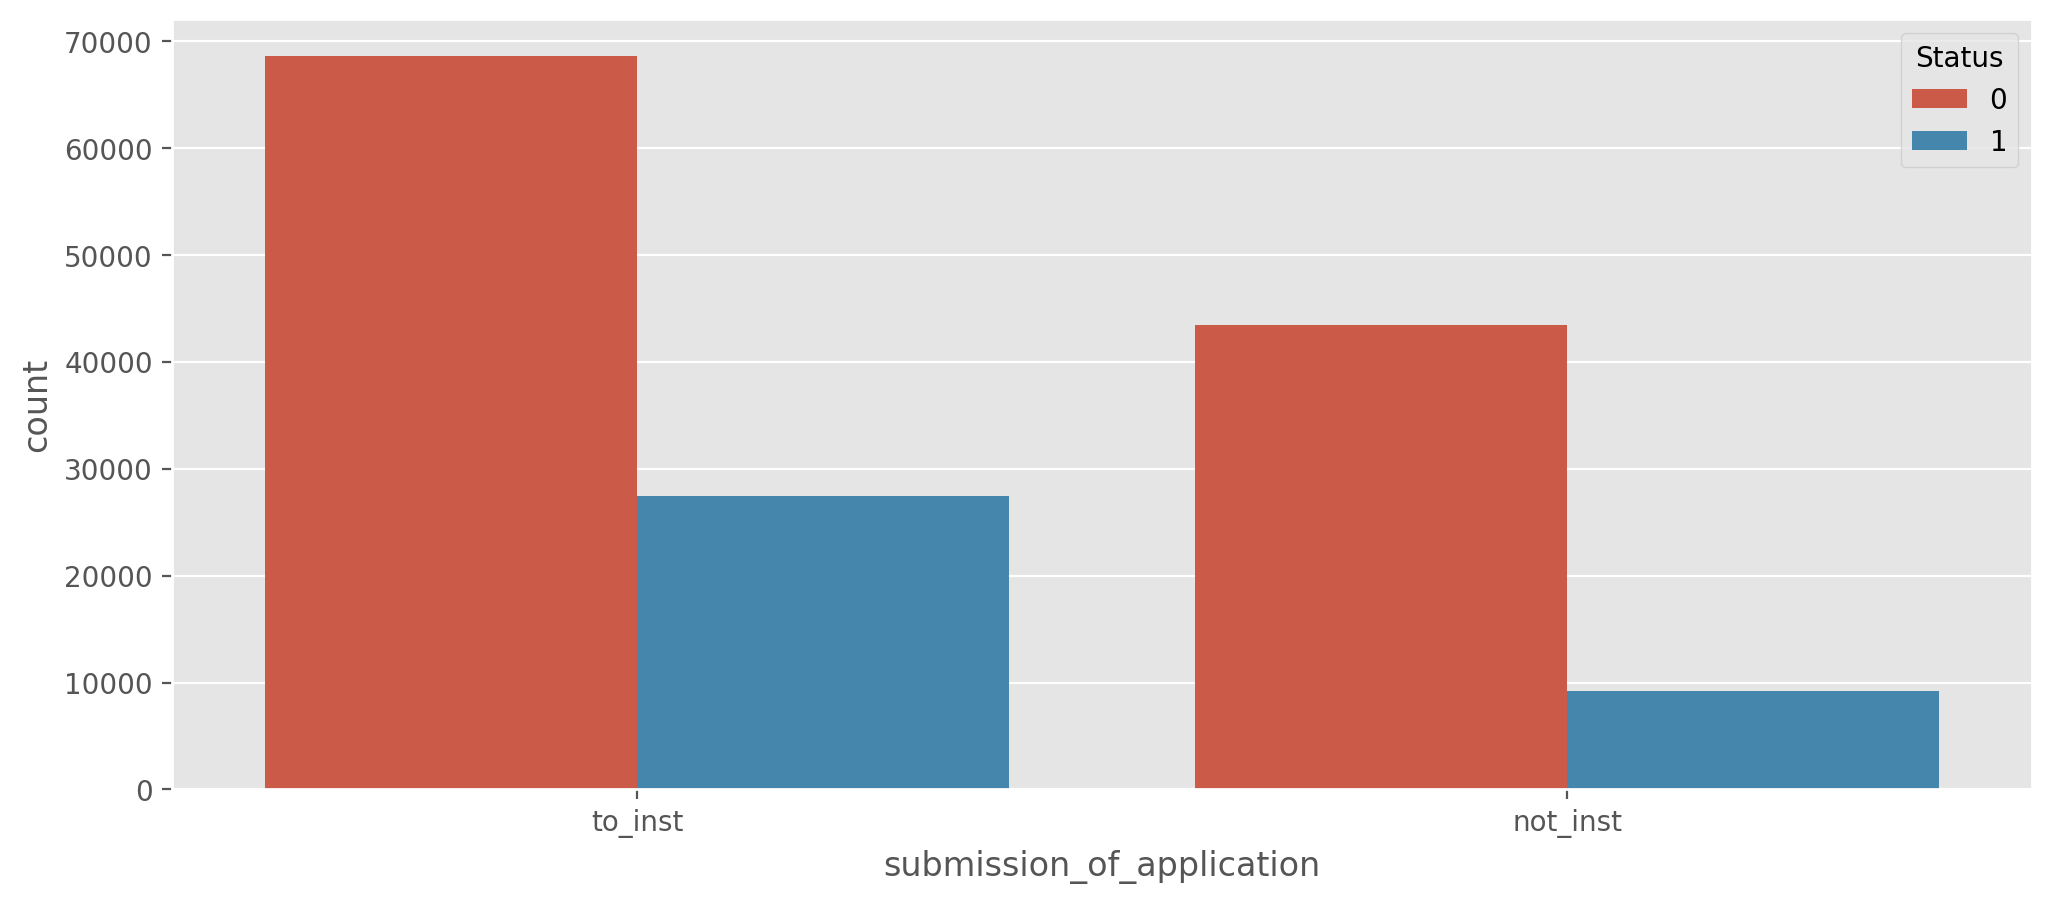

In [34]:
# submission_of_application vs Status
loan_lt = round(df.groupby('submission_of_application')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'submission_of_application', hue = 'Status',data=df)

Region      Status
North       0         77.0
            1         23.0
North-East  0         70.0
            1         30.0
central     0         72.0
            1         28.0
south       0         73.0
            1         27.0
Name: proportion, dtype: float64


<Axes: xlabel='Region', ylabel='count'>

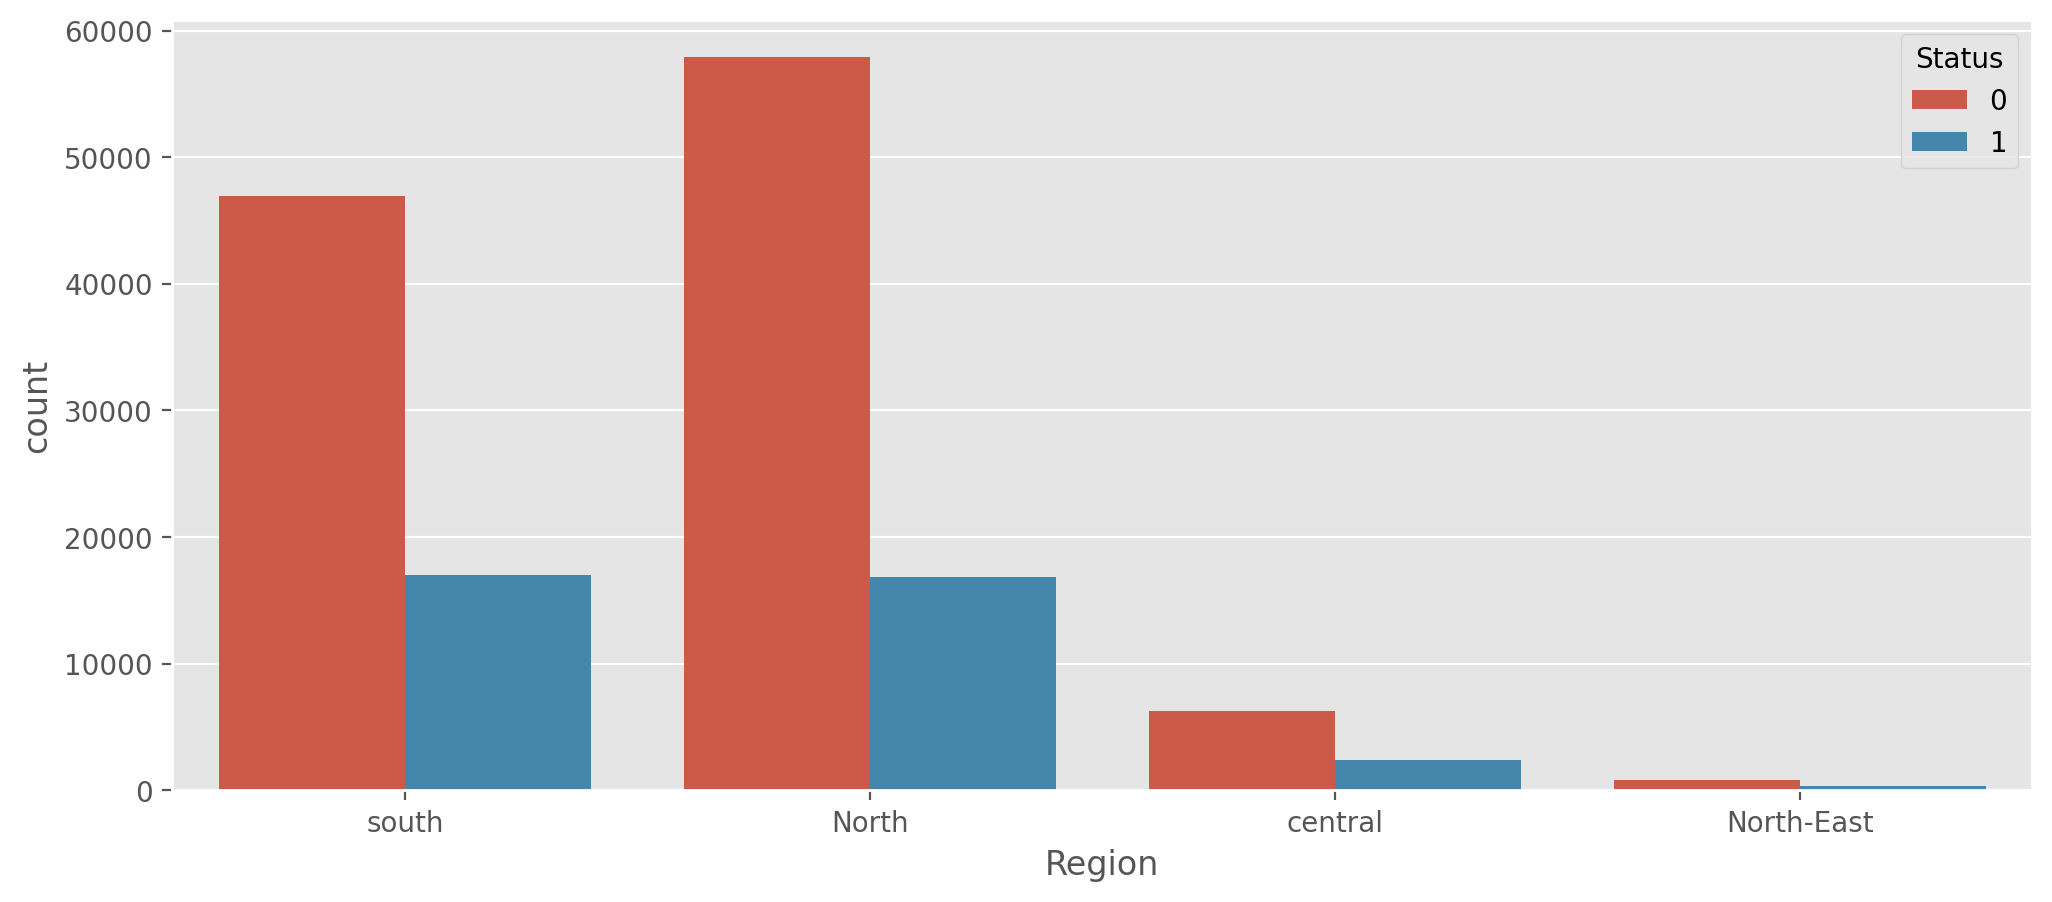

In [35]:
# Region vs Status
loan_lt = round(df.groupby('Region')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'Region', hue = 'Status',data=df)

Security_Type  Status
Indriect       1         100.0
direct         0          75.0
               1          25.0
Name: proportion, dtype: float64


<Axes: xlabel='Security_Type', ylabel='count'>

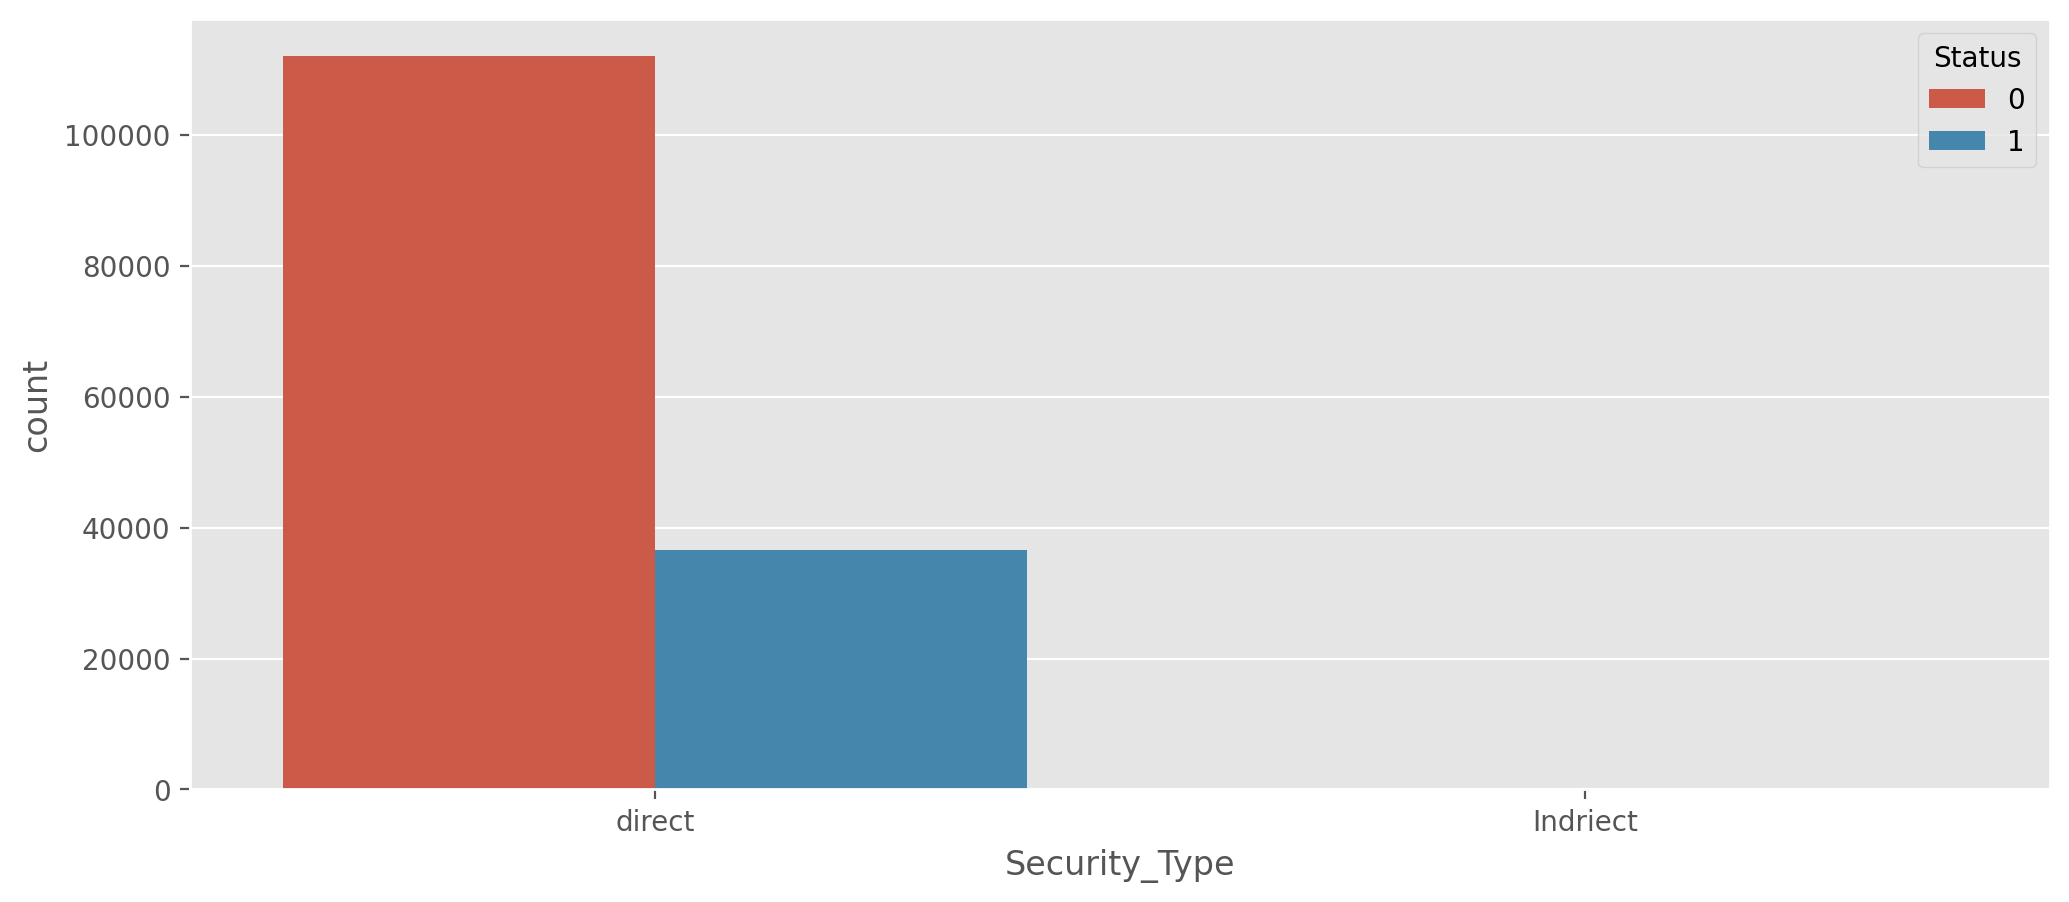

In [36]:
# Security_Type vs Status
loan_lt = round(df.groupby('Security_Type')['Status'].value_counts(normalize = True),2)*100
print(loan_lt)
plt.figure(figsize = (12,5),dpi = 200)
sns.countplot(x = 'Security_Type', hue = 'Status',data=df)

<Axes: xlabel='Status', ylabel='rate_of_interest'>

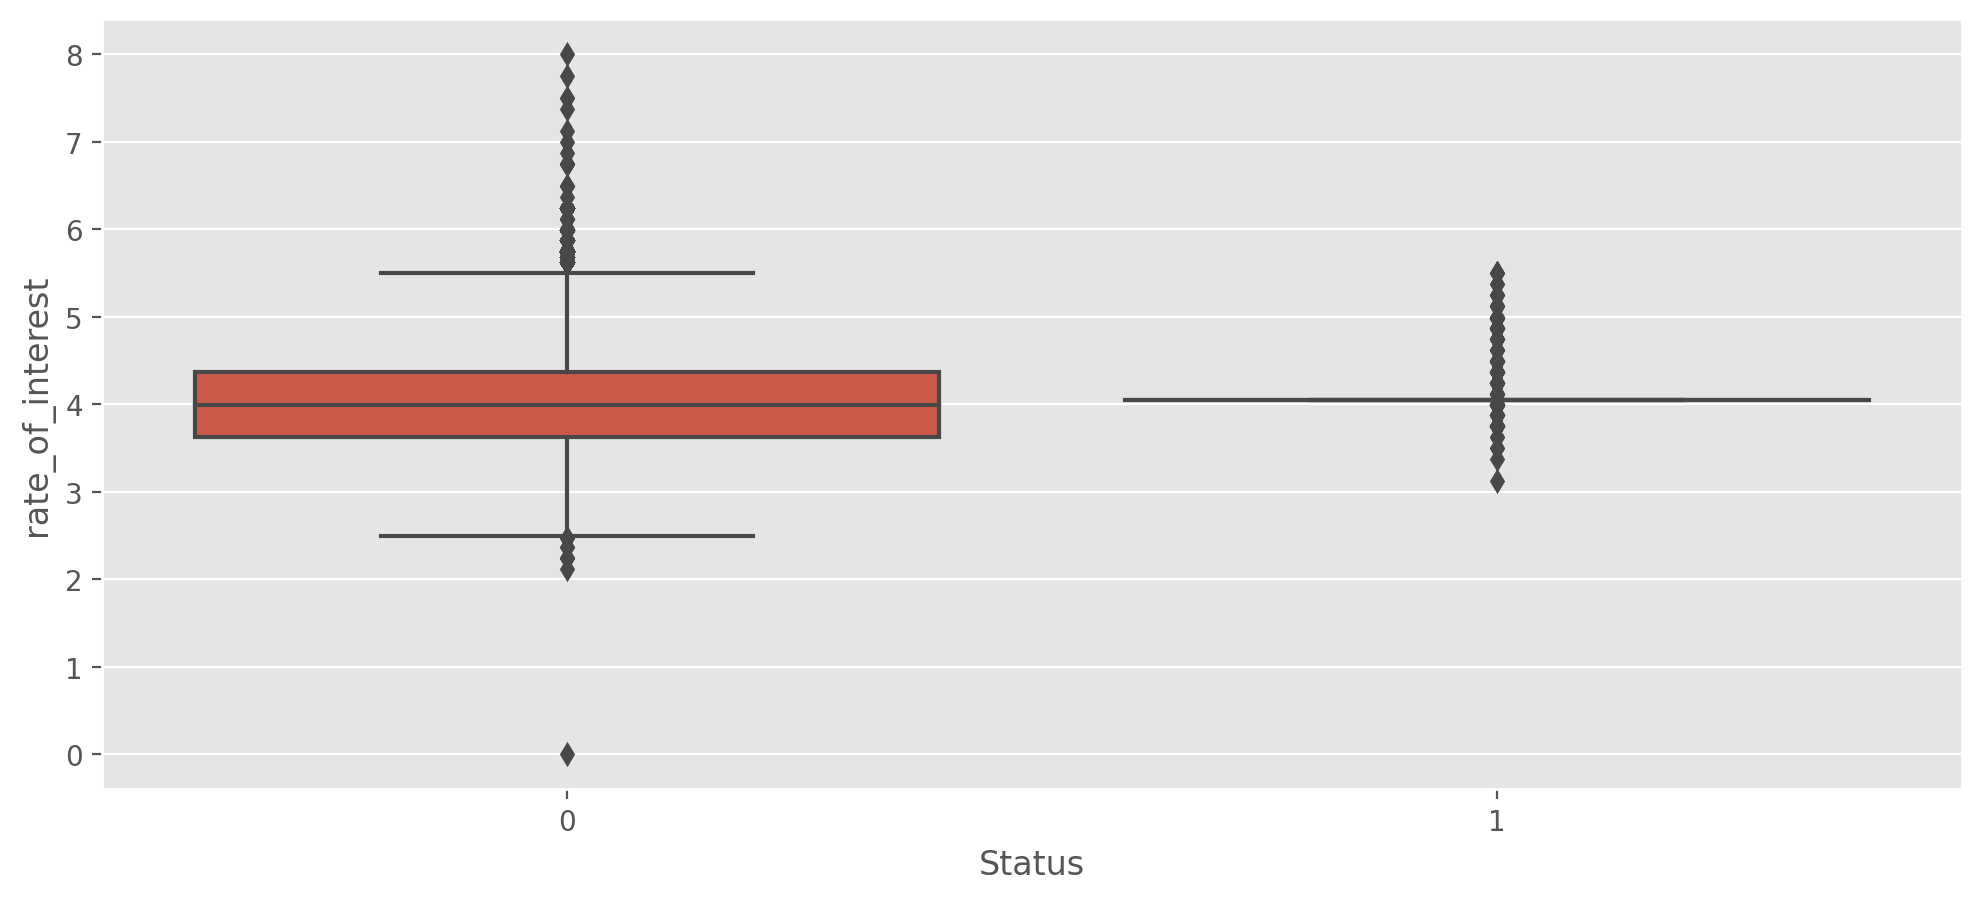

In [37]:
#rate_of_interest vs Status
plt.figure(figsize = (12,5),dpi = 200)
sns.boxplot(y = df['rate_of_interest'] ,x = df['Status'])

<Axes: xlabel='Status', ylabel='Interest_rate_spread'>

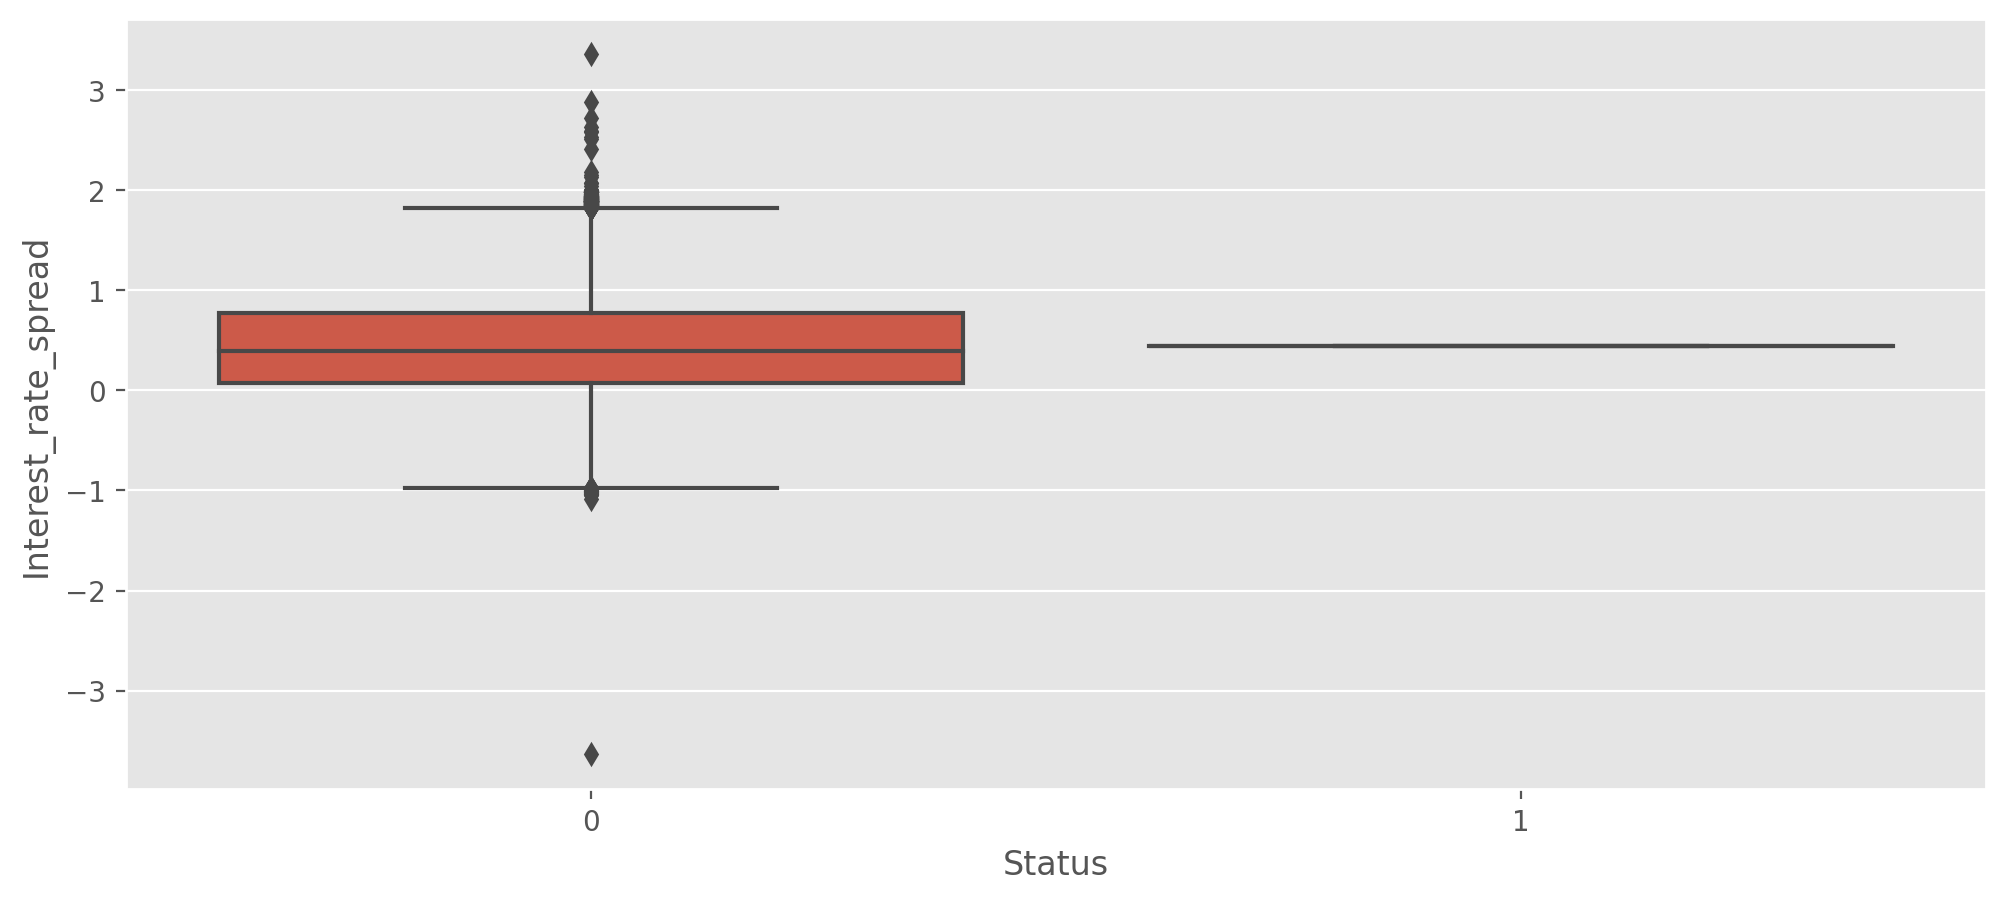

In [38]:
# Interest_rate_spread vs Status
plt.figure(figsize = (12,5),dpi = 200)
sns.boxplot(y = df['Interest_rate_spread'] ,x = df['Status'])


<Axes: xlabel='Status', ylabel='Upfront_charges'>

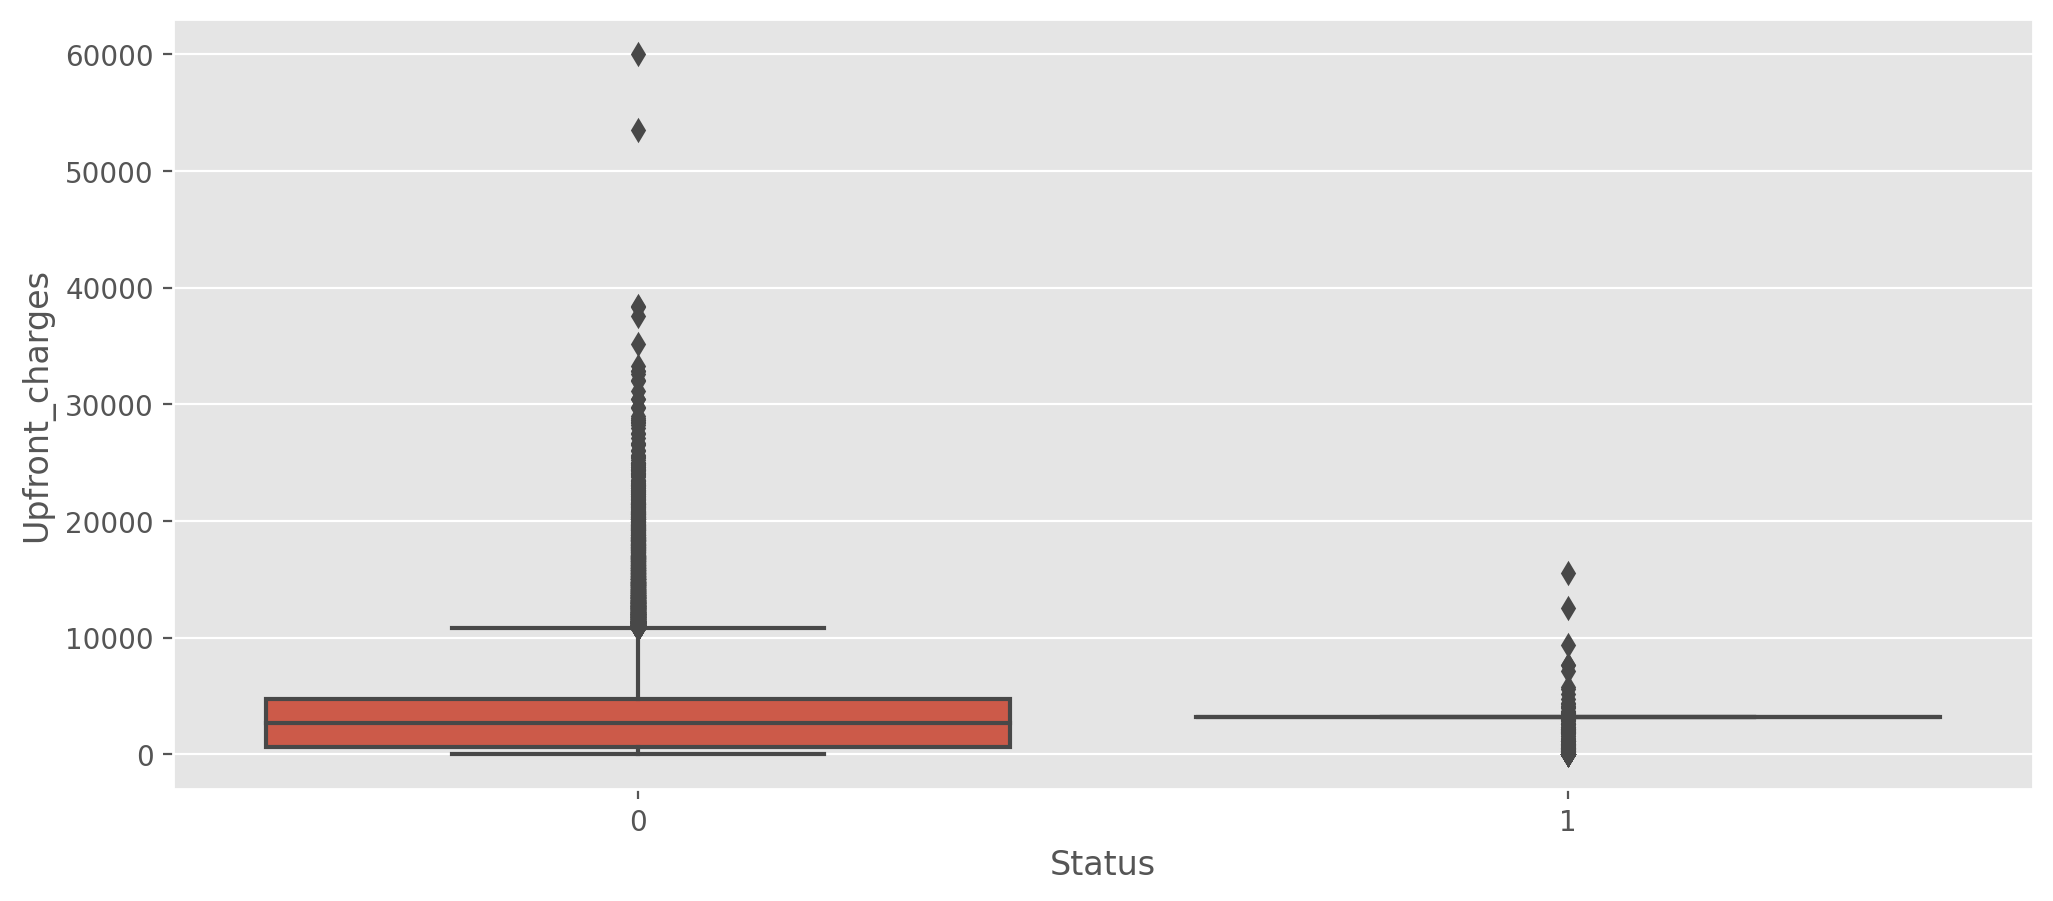

In [39]:
# Upfront_charges vs Status
plt.figure(figsize = (12,5),dpi = 200)
sns.boxplot(y = df['Upfront_charges'] ,x = df['Status'])


<Axes: xlabel='Status', ylabel='dtir1'>

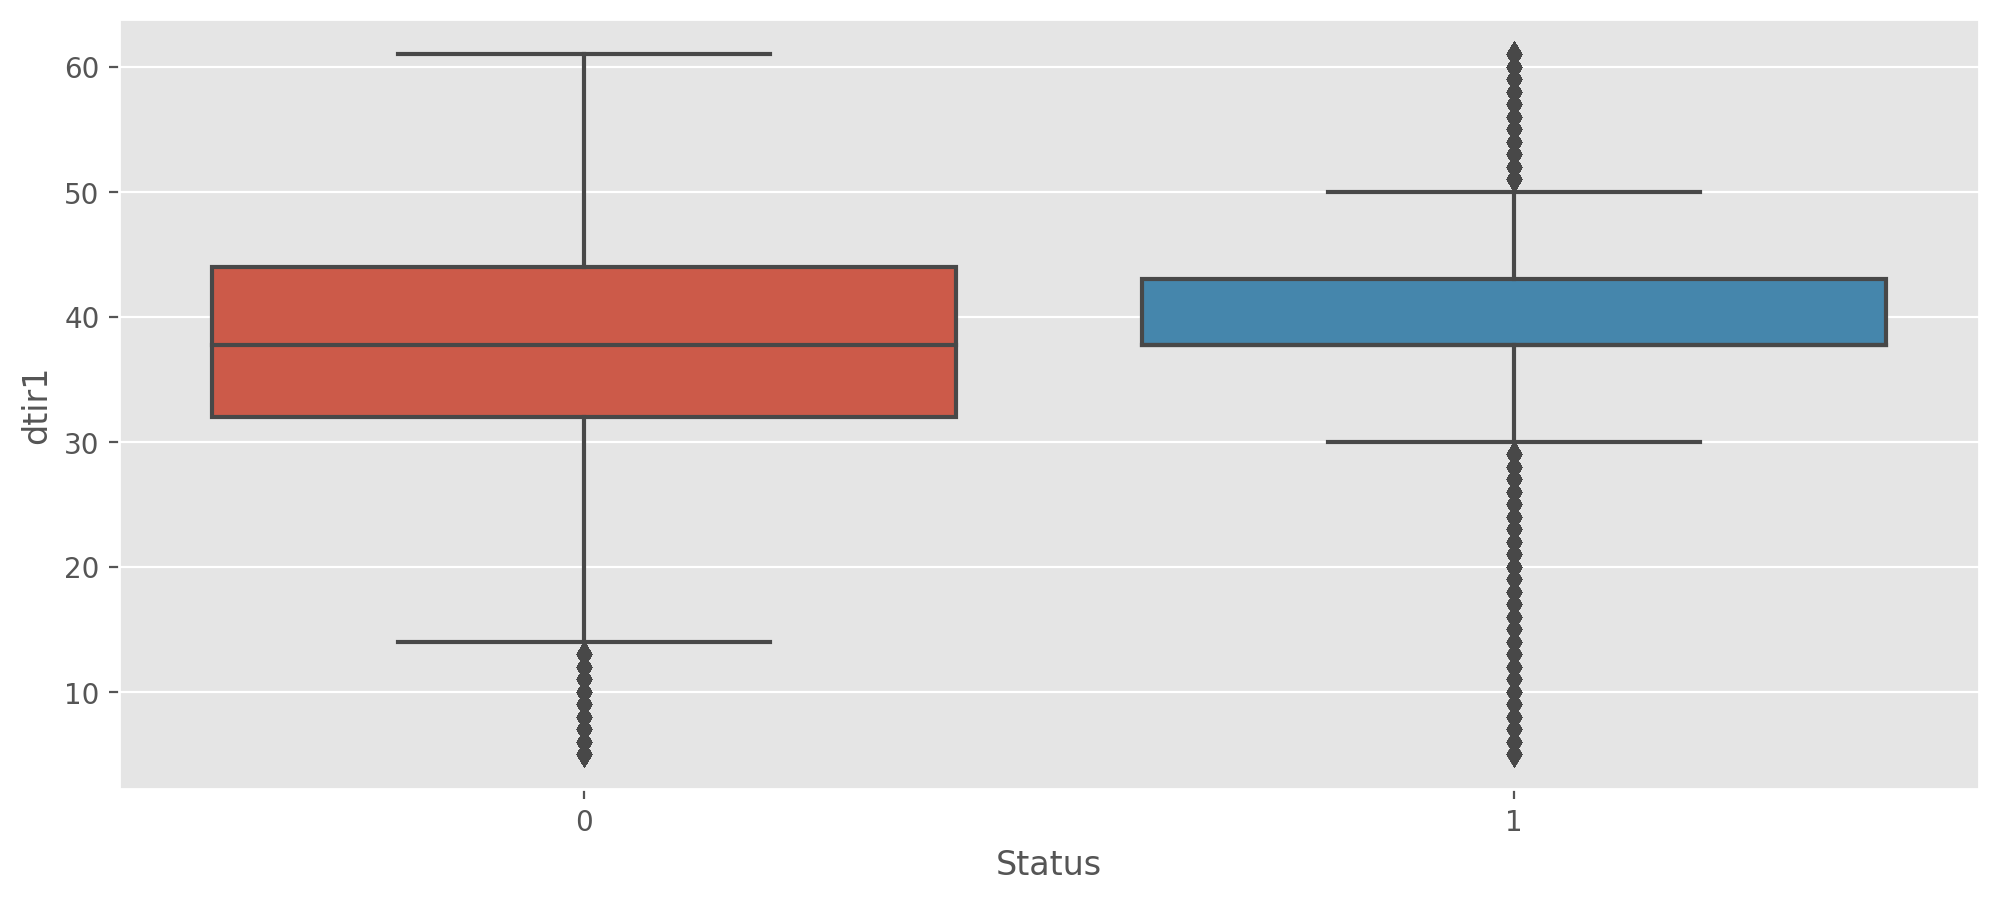

In [40]:
# dtir1 vs Status
plt.figure(figsize = (12,5),dpi = 200)
sns.boxplot(y = df['dtir1'] ,x = df['Status'])

<Axes: xlabel='Status', ylabel='dtir1'>

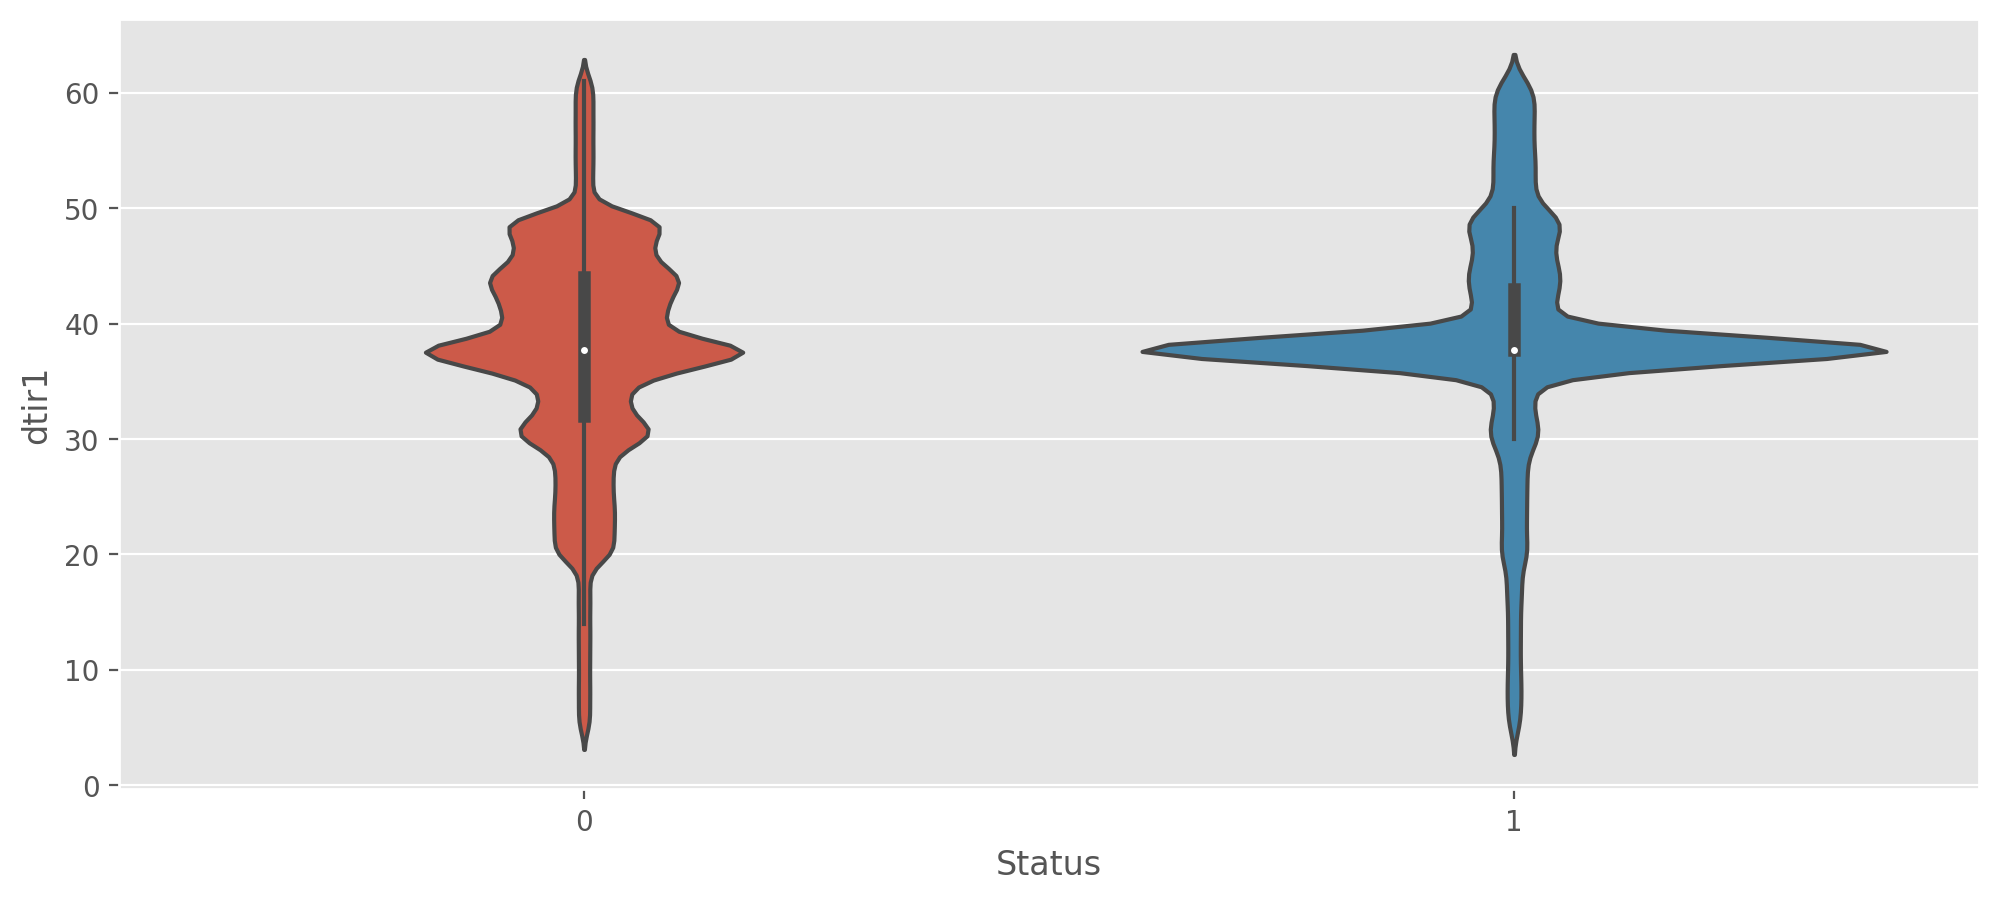

In [41]:
# dtir1 vs Status
plt.figure(figsize = (12,5),dpi = 200)
sns.violinplot(y = df['dtir1'] ,x = df['Status'])

<Axes: xlabel='Status', ylabel='Credit_Score'>

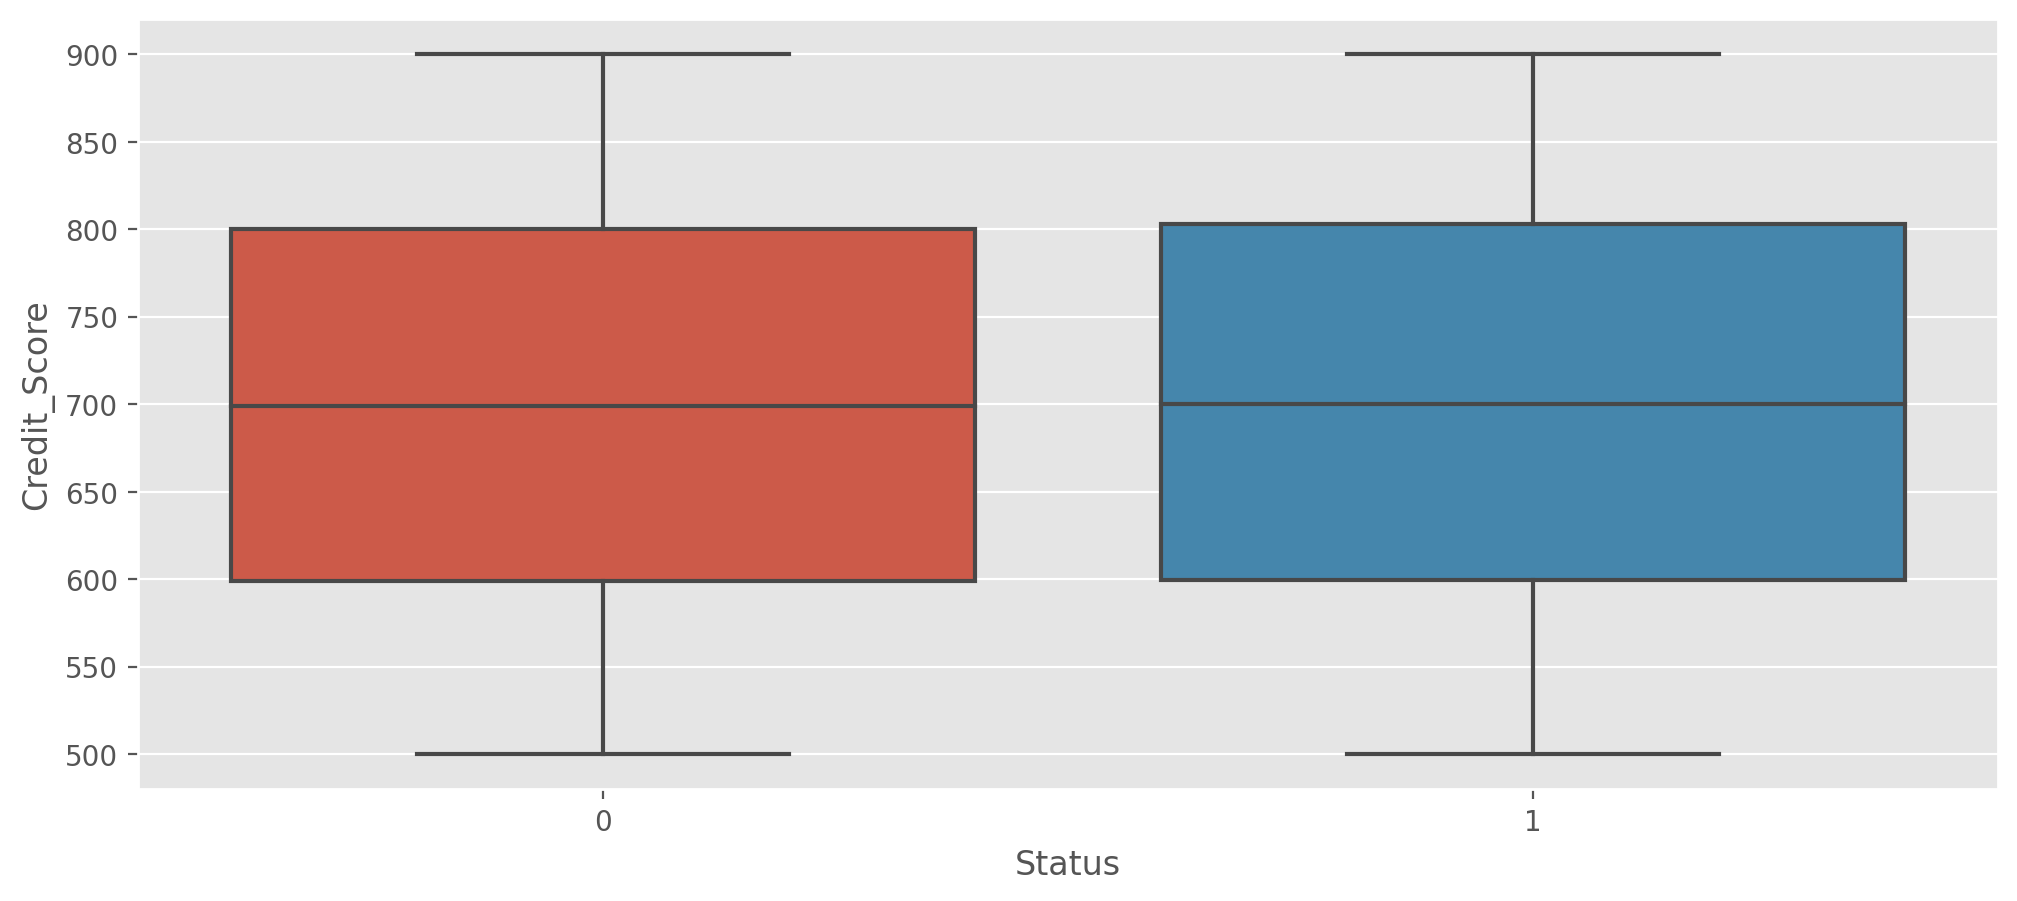

In [42]:
# Credit_Score vs Status
plt.figure(figsize = (12,5),dpi = 200)
sns.boxplot(y = df['Credit_Score'] ,x = df['Status'])

<Axes: xlabel='Status', ylabel='Upfront_charges'>

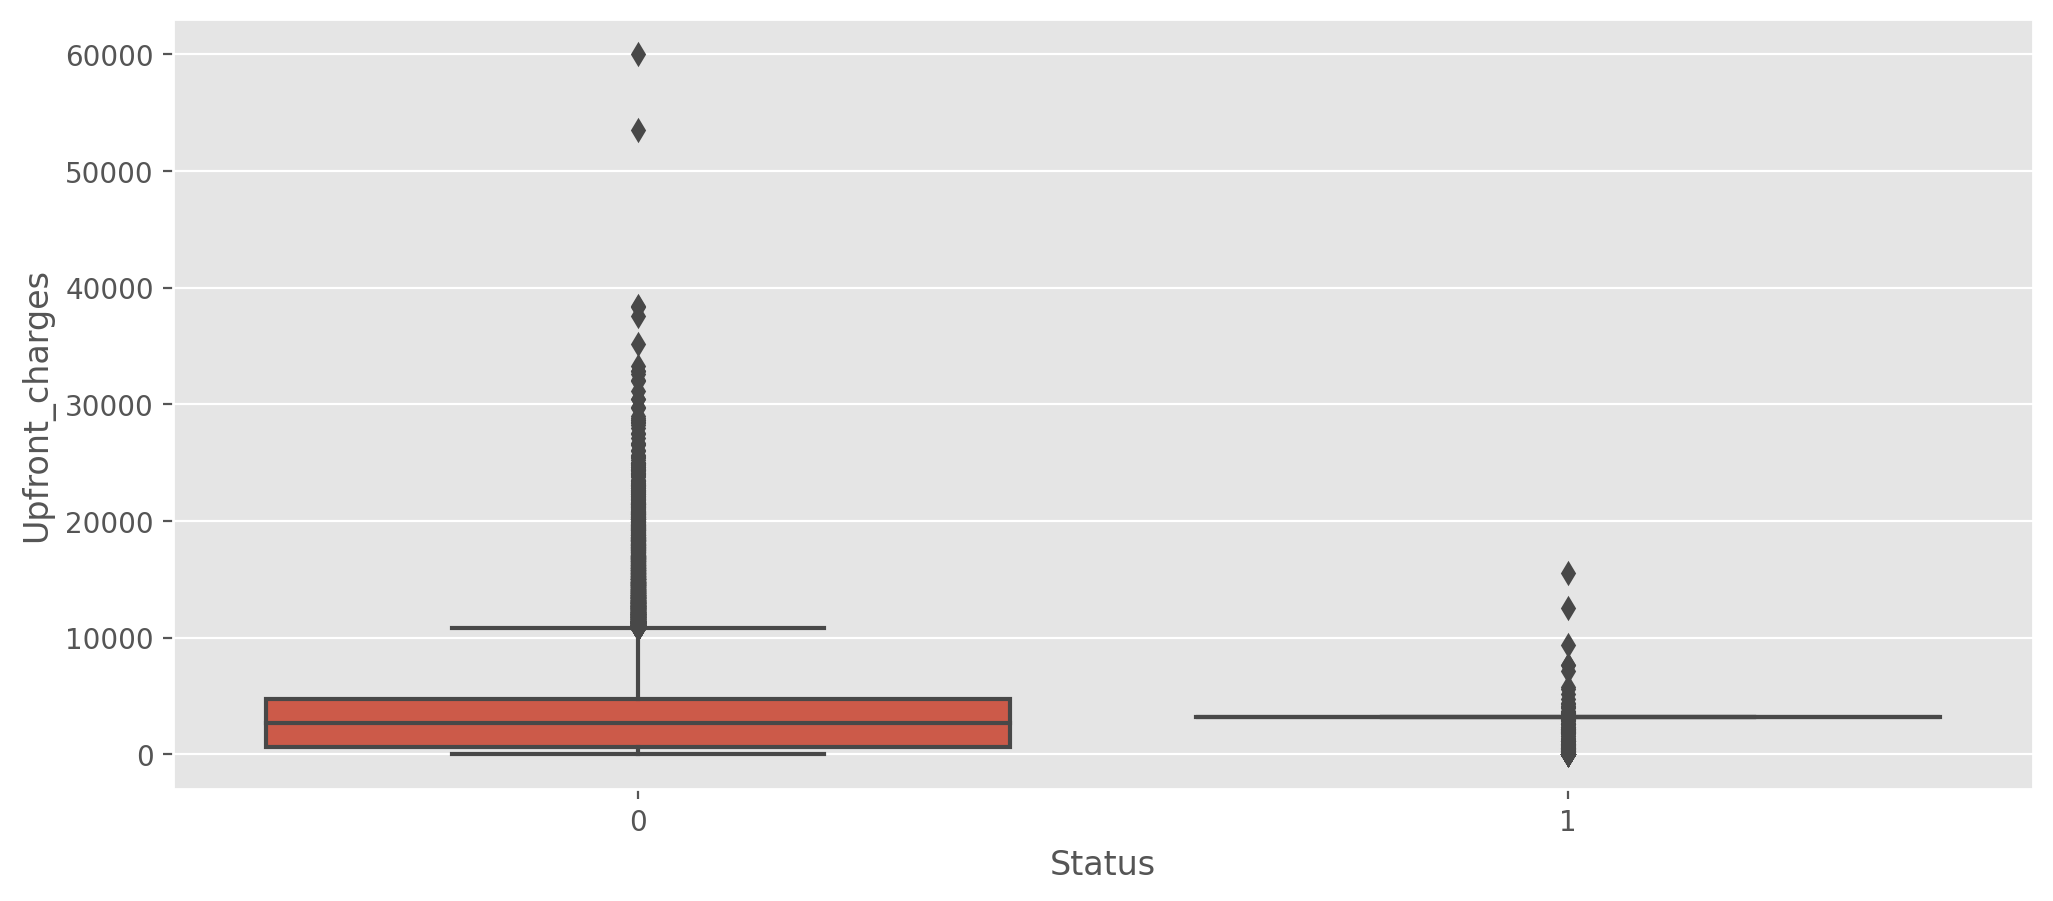

In [43]:
# Upfront_charges vs Status
plt.figure(figsize = (12,5),dpi = 200)
sns.boxplot(y = df['Upfront_charges'] ,x = df['Status'])

Text(0.5, 1.0, 'dtir1 Vs Status')

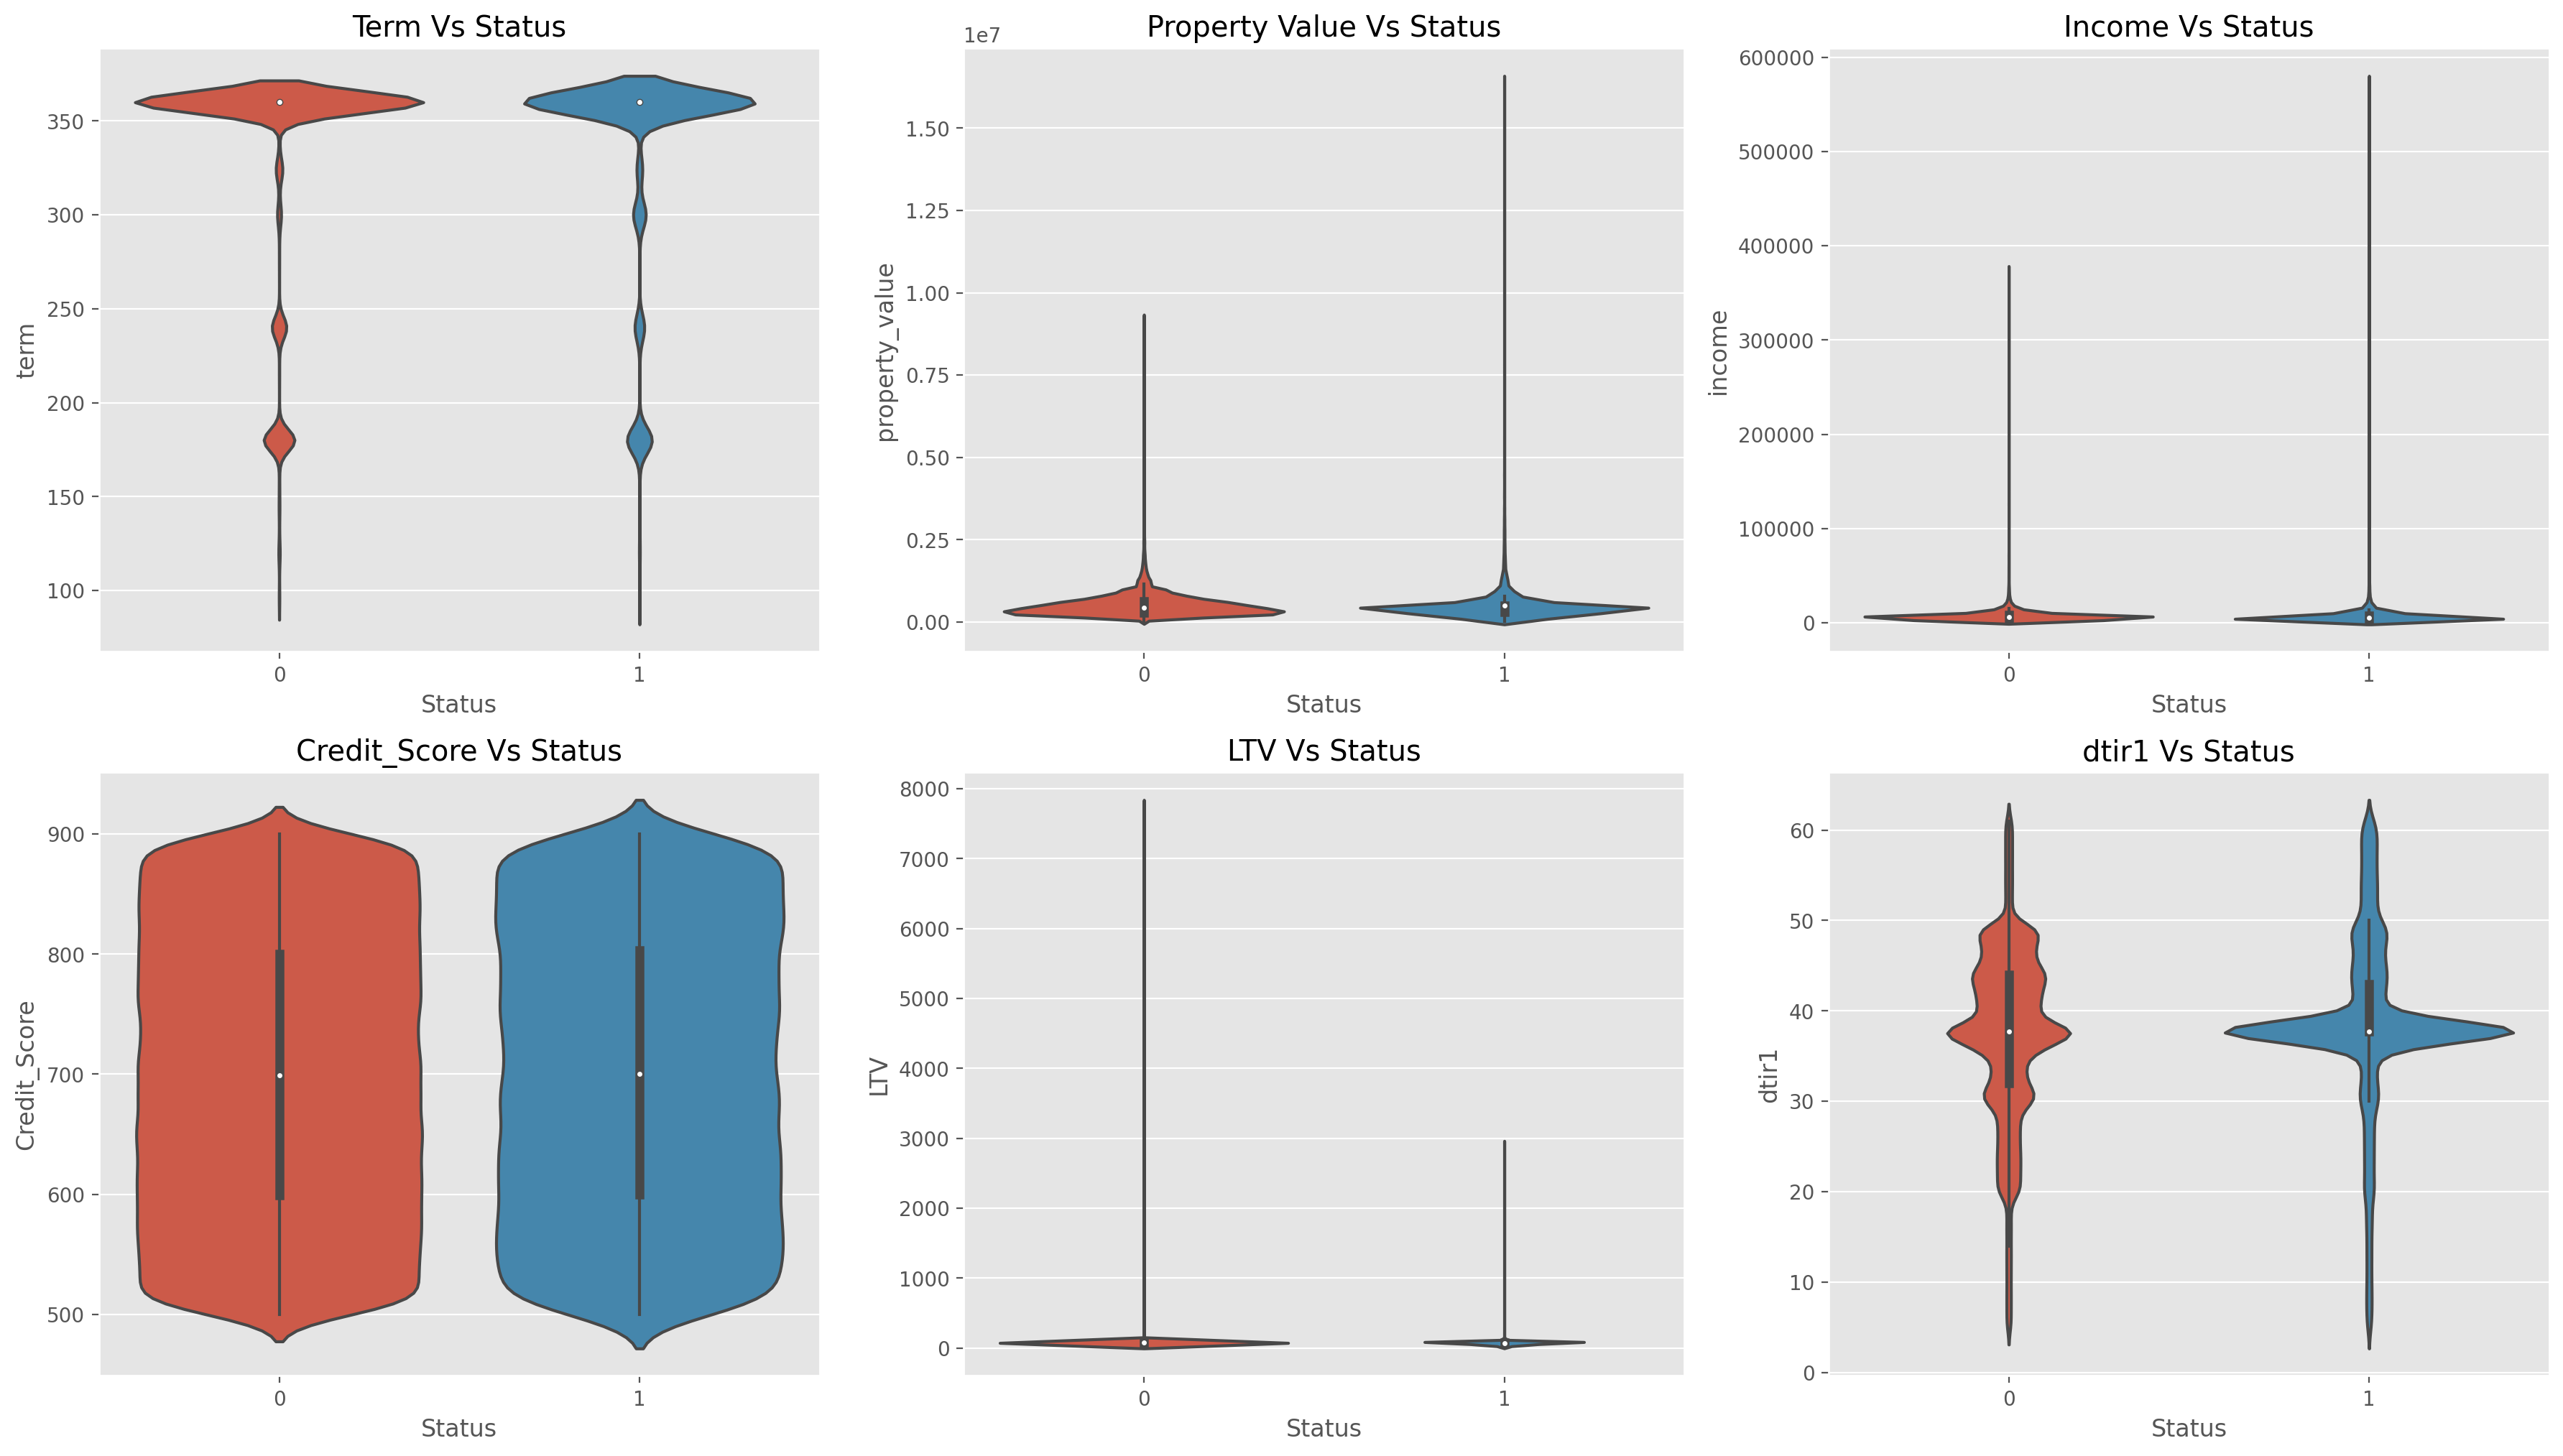

In [44]:
# Numerical Columns vs Status
plt.figure(figsize = (22,12),dpi = 200)
plt.subplot(2,3,1)
sns.violinplot(y = df['term'] ,x = df['Status'])
plt.title('Term Vs Status')
plt.subplot(2,3,2)
sns.violinplot(y = df['property_value'] ,x = df['Status'])
plt.title('Property Value Vs Status')
plt.subplot(2,3,3)
sns.violinplot(y = df['income'] ,x = df['Status'])
plt.title('Income Vs Status')
plt.subplot(2,3,4)
sns.violinplot(y = df['Credit_Score'] ,x = df['Status'])
plt.title('Credit_Score Vs Status')
plt.subplot(2,3,5)
sns.violinplot(y = df['LTV'] ,x = df['Status'])
plt.title('LTV Vs Status')
plt.subplot(2,3,6)
sns.violinplot(y = df['dtir1'] ,x = df['Status'])
plt.title('dtir1 Vs Status')

Text(0.5, 1.0, 'Upfront_charges Vs Status')

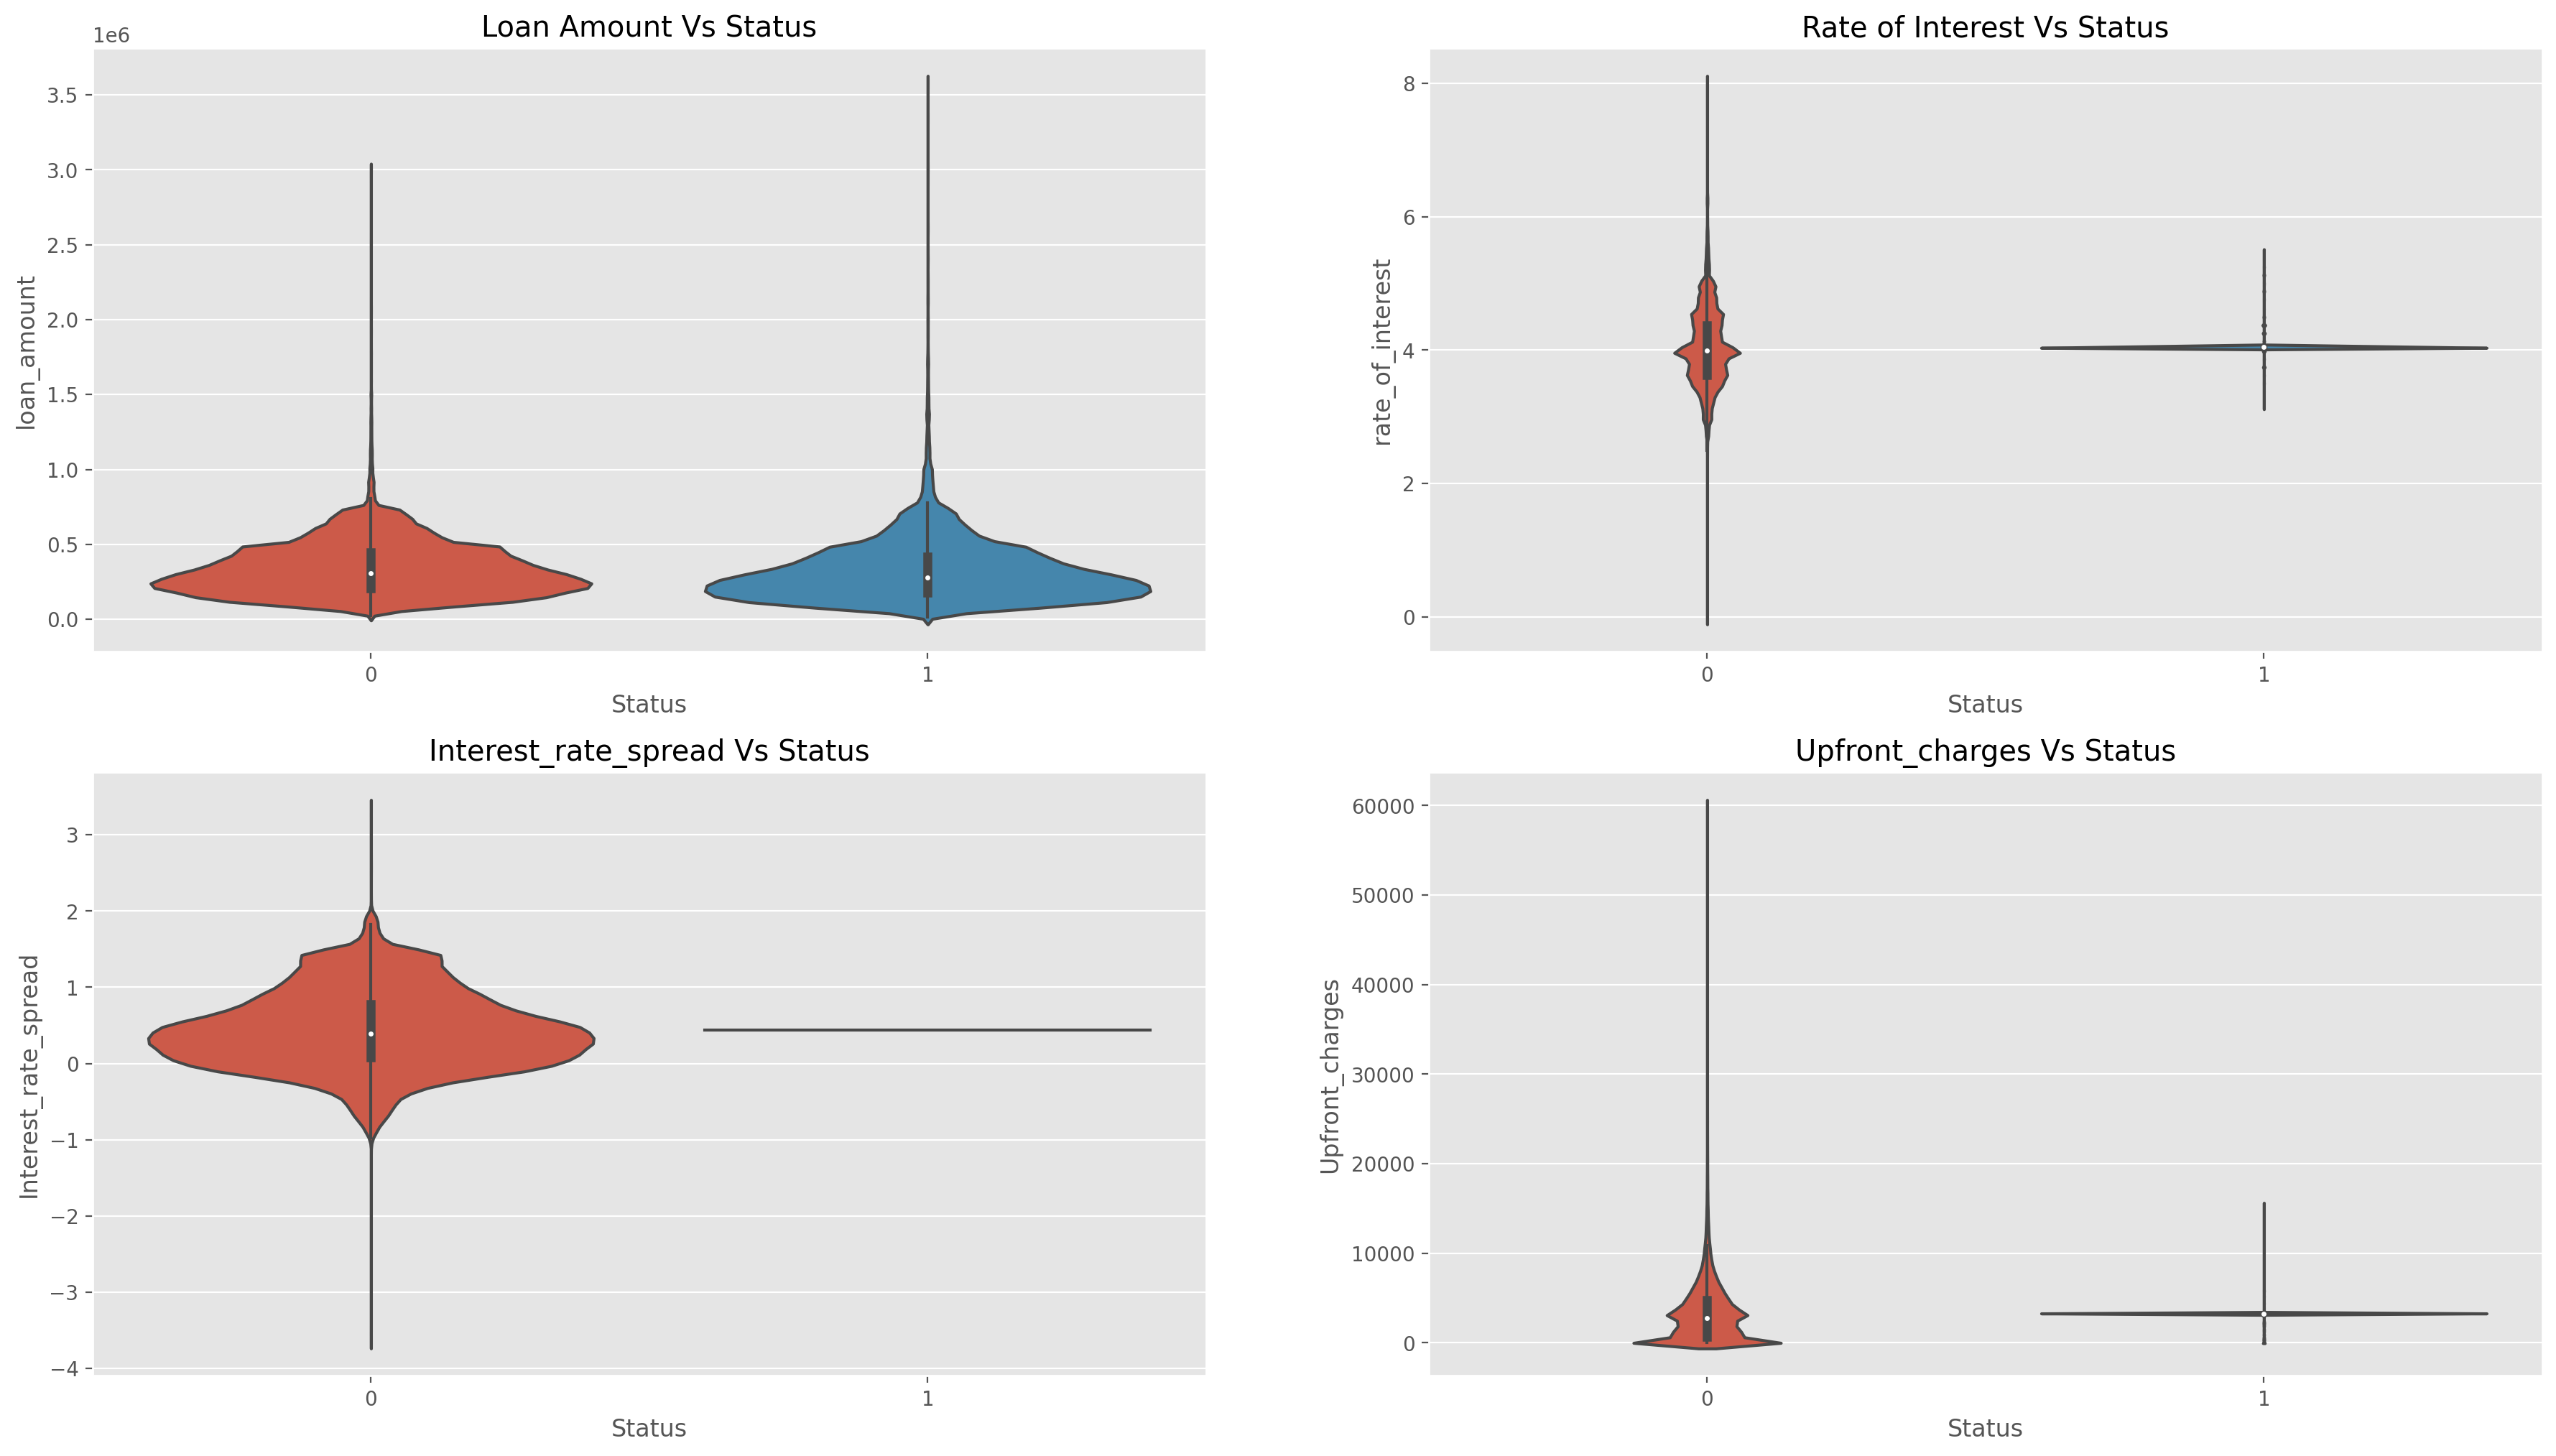

In [45]:
# Numerical Columns vs Status
plt.figure(figsize = (22,12),dpi = 200)
plt.subplot(2,2,1)
sns.violinplot(y = df['loan_amount'] ,x = df['Status'])
plt.title('Loan Amount Vs Status')
plt.subplot(2,2,2)
sns.violinplot(y = df['rate_of_interest'] ,x = df['Status'])
plt.title('Rate of Interest Vs Status')
plt.subplot(2,2,3)
sns.violinplot(y = df['Interest_rate_spread'] ,x = df['Status'])
plt.title('Interest_rate_spread Vs Status')
plt.subplot(2,2,4)
sns.violinplot(y = df['Upfront_charges'] ,x = df['Status'])
plt.title('Upfront_charges Vs Status')



### Feature Set creation

In [46]:
cols = ['open_credit',
        'Neg_ammortization',
        'construction_type',
        'Secured_by',
        'credit_type',
        'co-applicant_credit_type',
        'Security_Type',
        'loan_amount',
        'rate_of_interest',
        'Interest_rate_spread',
        'Upfront_charges',
        'LTV']
X = df[cols]
Y = df[['Status']]

In [47]:
X.head(10)

,open_credit,Neg_ammortization,construction_type,Secured_by,credit_type,co-applicant_credit_type,Security_Type,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,LTV
0,nopc,not_neg,sb,home,EXP,CIB,direct,116500,4.045476,0.441656,3224.996127,98.728814
1,nopc,not_neg,sb,home,EQUI,EXP,direct,206500,4.045476,0.441656,3224.996127,72.746457
2,nopc,neg_amm,sb,home,EXP,CIB,direct,406500,4.560000,0.200000,595.000000,80.019685
3,nopc,not_neg,sb,home,EXP,CIB,direct,456500,4.250000,0.681000,3224.996127,69.376900
4,nopc,not_neg,sb,home,CRIF,EXP,direct,696500,4.000000,0.304200,0.000000,91.886544
5,nopc,not_neg,sb,home,EXP,EXP,direct,706500,3.990000,0.152300,370.000000,70.089286
6,nopc,not_neg,sb,home,EXP,EXP,direct,346500,4.500000,0.999800,5120.000000,79.109589
7,nopc,not_neg,sb,home,CIB,CIB,direct,266500,4.125000,0.297500,5609.880000,86.525974
8,nopc,not_neg,sb,home,CIB,EXP,direct,376500,4.875000,0.739500,1150.000000,78.765690
9,nopc,not_neg,sb,home,CIB,EXP,direct,436500,3.490000,-0.277600,2316.500000,63.444767


In [48]:
Y.head(10)

,Status
0,1
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [49]:
print('Independent Feature set Shape:',X.shape)
print('Dependent Feature set Shape:',Y.shape)

Independent Feature set Shape: (148670, 12)
Dependent Feature set Shape: (148670, 1)


In [50]:
# Splitting Data into train-test Sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 5)

#check shapes of train test sets
print('Training data Shape:',x_train.shape)
print('Traininging Label Shape:',y_train.shape)
print('Testing data Shape:',x_test.shape)
print('Testing Label Shape:',y_test.shape)

Training data Shape: (118936, 12)
Traininging Label Shape: (118936, 1)
Testing data Shape: (29734, 12)
Testing Label Shape: (29734, 1)


In [51]:
# Scaling Numerical Columns

cols = ['loan_amount',
        'rate_of_interest',
        'Interest_rate_spread',
        'Upfront_charges',
        'LTV']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
scaler.fit(x_train[cols])

MinMaxScaler()

In [53]:
x_train[cols] = scaler.transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

In [54]:
# Encoding the Categorical columns
cols = ['open_credit',
        'Neg_ammortization',
        'construction_type',
        'Secured_by',
        'credit_type',
        'co-applicant_credit_type',
        'Security_Type']

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [55]:
encoder.fit(x_train[cols])

OrdinalEncoder()

In [56]:
x_train[cols] = encoder.transform(x_train[cols])
x_test[cols] = encoder.transform(x_test[cols])

In [57]:
x_train.head()

,open_credit,Neg_ammortization,construction_type,Secured_by,credit_type,co-applicant_credit_type,Security_Type,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,LTV
17711,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.126126,0.562500,0.643660,0.067707,0.007750
50505,0.0,1.0,1.0,0.0,3.0,0.0,1.0,0.099099,0.453125,0.537384,0.216875,0.004140
117354,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.051051,0.711250,0.732981,0.076563,0.009480
90606,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.048048,0.484375,0.551094,0.037400,0.006173
127796,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.075075,0.531250,0.673810,0.089502,0.011297


In [58]:
x_test.head()

,open_credit,Neg_ammortization,construction_type,Secured_by,credit_type,co-applicant_credit_type,Security_Type,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,LTV
10042,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.039039,0.562500,0.657327,0.072143,0.006373
99320,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.036036,0.546875,0.603574,0.065000,0.005536
148540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.054054,0.623750,0.697827,0.088568,0.009603
104801,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.072072,0.421875,0.516240,0.104167,0.004855
57295,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.054054,0.453125,0.520214,0.080208,0.006515


### Training the Model

In [59]:
#Training the Model using Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [60]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [61]:
# Lets check the Accuracy Score

from sklearn.metrics import accuracy_score
print('Training Set Accuracy :',accuracy_score(y_train,pred_train))
print('Testing Set Accuracy:',accuracy_score(y_test,pred_test))

Training Set Accuracy : 0.7627967982780656
Testing Set Accuracy: 0.7642093226609269


In [62]:
# Training the Model using K Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [63]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [65]:
# Lets check the Accuracy Score

from sklearn.metrics import accuracy_score
print('Training Set Accuracy :',accuracy_score(y_train,pred_train))
print('Testing Set Accuracy:',accuracy_score(y_test,pred_test))

Training Set Accuracy : 0.9988481199973095
Testing Set Accuracy: 0.9970404251025762
